## Convenciones

Agregar las descripciones de las variables (a usar)

In [173]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Opcion 3 de item 1b
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams["figure.figsize"] = (24,14)
plt.rcParams.update({'font.size': 18})
df = pd.read_csv("/work/properati_argentina_2021.csv")

In [3]:
df.head(10)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell
5,F9tamlHF5c8kGM6XRTsCKQ==,2021-09-09,2022-01-27,2021-09-09,-34.859680,-56.195410,Montevideo,NaN,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,54.0,54.0,189900.0,USD,Apartamento - Prado
6,NqZ7NCaGZKarCdU/V0vHfw==,2021-09-09,2021-09-14,2021-09-09,NaN,NaN,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,Venta,Casa,5.0,3.0,294.0,254.0,249000.0,USD,Casa - Los Cardales
7,gRTl4HxCqiGIwGRq0r1oag==,2021-09-09,2022-01-05,2021-09-09,NaN,NaN,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,Venta,Casa,7.0,3.0,462.0,308.0,460000.0,USD,Casa - Los Cardales
8,Y8n0DpI7wgglQ6QISaTB4g==,2021-09-09,2021-09-10,2021-09-09,-34.901935,-56.183708,Montevideo,NaN,NaN,NaN,NaN,Alquiler,Departamento,5.0,2.0,60.0,60.0,26760.0,UYU,Apartamento - Cordón
9,HMt6tiEI+xILu5W6cjGdiw==,2021-09-09,2021-10-28,2021-09-09,-34.866268,-56.092273,Montevideo,NaN,NaN,NaN,NaN,Alquiler,Casa,5.0,2.0,70.0,70.0,19000.0,UYU,Casa - Carrasco Norte


In [4]:
df.tail()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion
460153,Y7KBafQ+e5noGh2Pio0xLg==,2021-01-05,9999-12-31,2021-01-05,-26.827938,-65.220708,Tucumán,San Miguel de Tucumán,NaN,NaN,NaN,Venta,Local comercial,1.0,NaN,243.0,133.0,160000.0,USD,Local - San Miguel De Tucumán


## Selección de datos

##### Removemos columnas que estamos seguros de que no se van a utilizar

In [5]:
df.drop(['id', 'start_date', 'end_date', 'created_on'], axis=1, inplace=True)

##### Filtramos la ubicación para quedarnos con las ubicaciones que están en Capital Federal únicamente

In [9]:
df_filtrado = df.query("place_l2 == 'Capital Federal'")

##### Verificamos que efectivamente exista solo Capital Federal

In [10]:
df_filtrado['place_l2'].unique()

array(['Capital Federal'], dtype=object)

##### Filtramos property_type por vivienda: Casa, Depto y PH

In [12]:
df_filtrado = df_filtrado.query("property_type == 'Casa' or property_type == 'PH' or property_type == 'Departamento'")
df_filtrado.property_type.unique()

array(['Casa', 'Departamento', 'PH'], dtype=object)

In [ ]:
pd.crosstab(index=df_filtrado['property_type'], columns=df_filtrado['property_currency'], margins=True)

property_currency,ARS,USD,All
property_type,,,
Casa,281,4339,4620
Departamento,29485,86709,116194
PH,1140,9354,10494
All,30906,100402,131308


##### Filtramos por tipo de operación: venta

In [14]:
df_filtrado = df_filtrado.query("operation == 'Venta'")
df_filtrado['operation'].value_counts()

Venta    95543
Name: operation, dtype: int64

##### Filtramos y nos quedamos con las propiedades que tienen el precio en dólares

In [15]:
df_filtrado = df_filtrado[df_filtrado['property_currency'] == "USD"]
df_filtrado.property_currency.unique()

array(['USD'], dtype=object)

##### Luego de filtrar por tipo de operación y moneda, podemos eliminar estas columnas ya que tendrán un único valor

In [16]:
df_filtrado.drop(['operation', 'property_currency'], axis=1, inplace=True)

##### Dado que no hay información respecto a las columnas l5 y l6, revisamos que tipo de datos tienen

In [40]:
df_filtrado["place_l5"].value_counts()

KeyError: 'place_l5'

In [ ]:
df_filtrado["place_l6"].value_counts()

Series([], Name: place_l6, dtype: int64)

##### Como vemos que ambas columnas están vacías, podemos dropearlas del dataframe

In [ ]:
df_filtrado.drop(['place_l5', 'place_l6'], axis=1, inplace=True)

In [17]:
#Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).
df_train, df_test = train_test_split(df_filtrado,
                                     test_size=0.2, # proporcion 80/20
                                     random_state=2) #semilla random

## Ejercicio 1a: exploración inicial

### Tipo de variable

In [18]:
df_filtrado.dtypes

latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_title               object
dtype: object

### Variables Cuantitativas

In [19]:
#variables cuantitativas, media
df_filtrado.mean()

latitud                        -34.591481
longitud                       -58.449795
property_rooms                   2.822799
property_bedrooms                2.014629
property_surface_total         109.092970
property_surface_covered        87.931932
property_price              226238.207185
dtype: float64

In [20]:
# variables cuantitativas, mediana
df_filtrado.median()

latitud                        -34.59579
longitud                       -58.43900
property_rooms                   3.00000
property_bedrooms                2.00000
property_surface_total          65.00000
property_surface_covered        58.00000
property_price              143900.00000
dtype: float64

In [21]:
# variables cuantitativas, q1
df_filtrado.quantile(0.25)

latitud                       -34.615975
longitud                      -58.466522
property_rooms                  2.000000
property_bedrooms               1.000000
property_surface_total         45.000000
property_surface_covered       40.000000
property_price              95000.000000
Name: 0.25, dtype: float64

In [22]:
# variables cuantitativas, q3
df_filtrado.quantile(0.75)

latitud                        -34.577413
longitud                       -58.408862
property_rooms                   4.000000
property_bedrooms                3.000000
property_surface_total         105.000000
property_surface_covered        88.000000
property_price              237000.000000
Name: 0.75, dtype: float64

In [23]:
# variables cuantitativas, moda
df_filtrado.mode()

,latitud,longitud,place_l2,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.54125,-58.472966,Capital Federal,Palermo,Palermo Hollywood,Departamento,3.0,1.0,50.0,40.0,110000.0,Departamento - Palermo


### Variables Cualitativas: cantidad de valores posibles, y frecuencias de cada uno.

Análisis de la variable place_l3 (ciudades) como un gráfico de barras, comparando su frecuencia

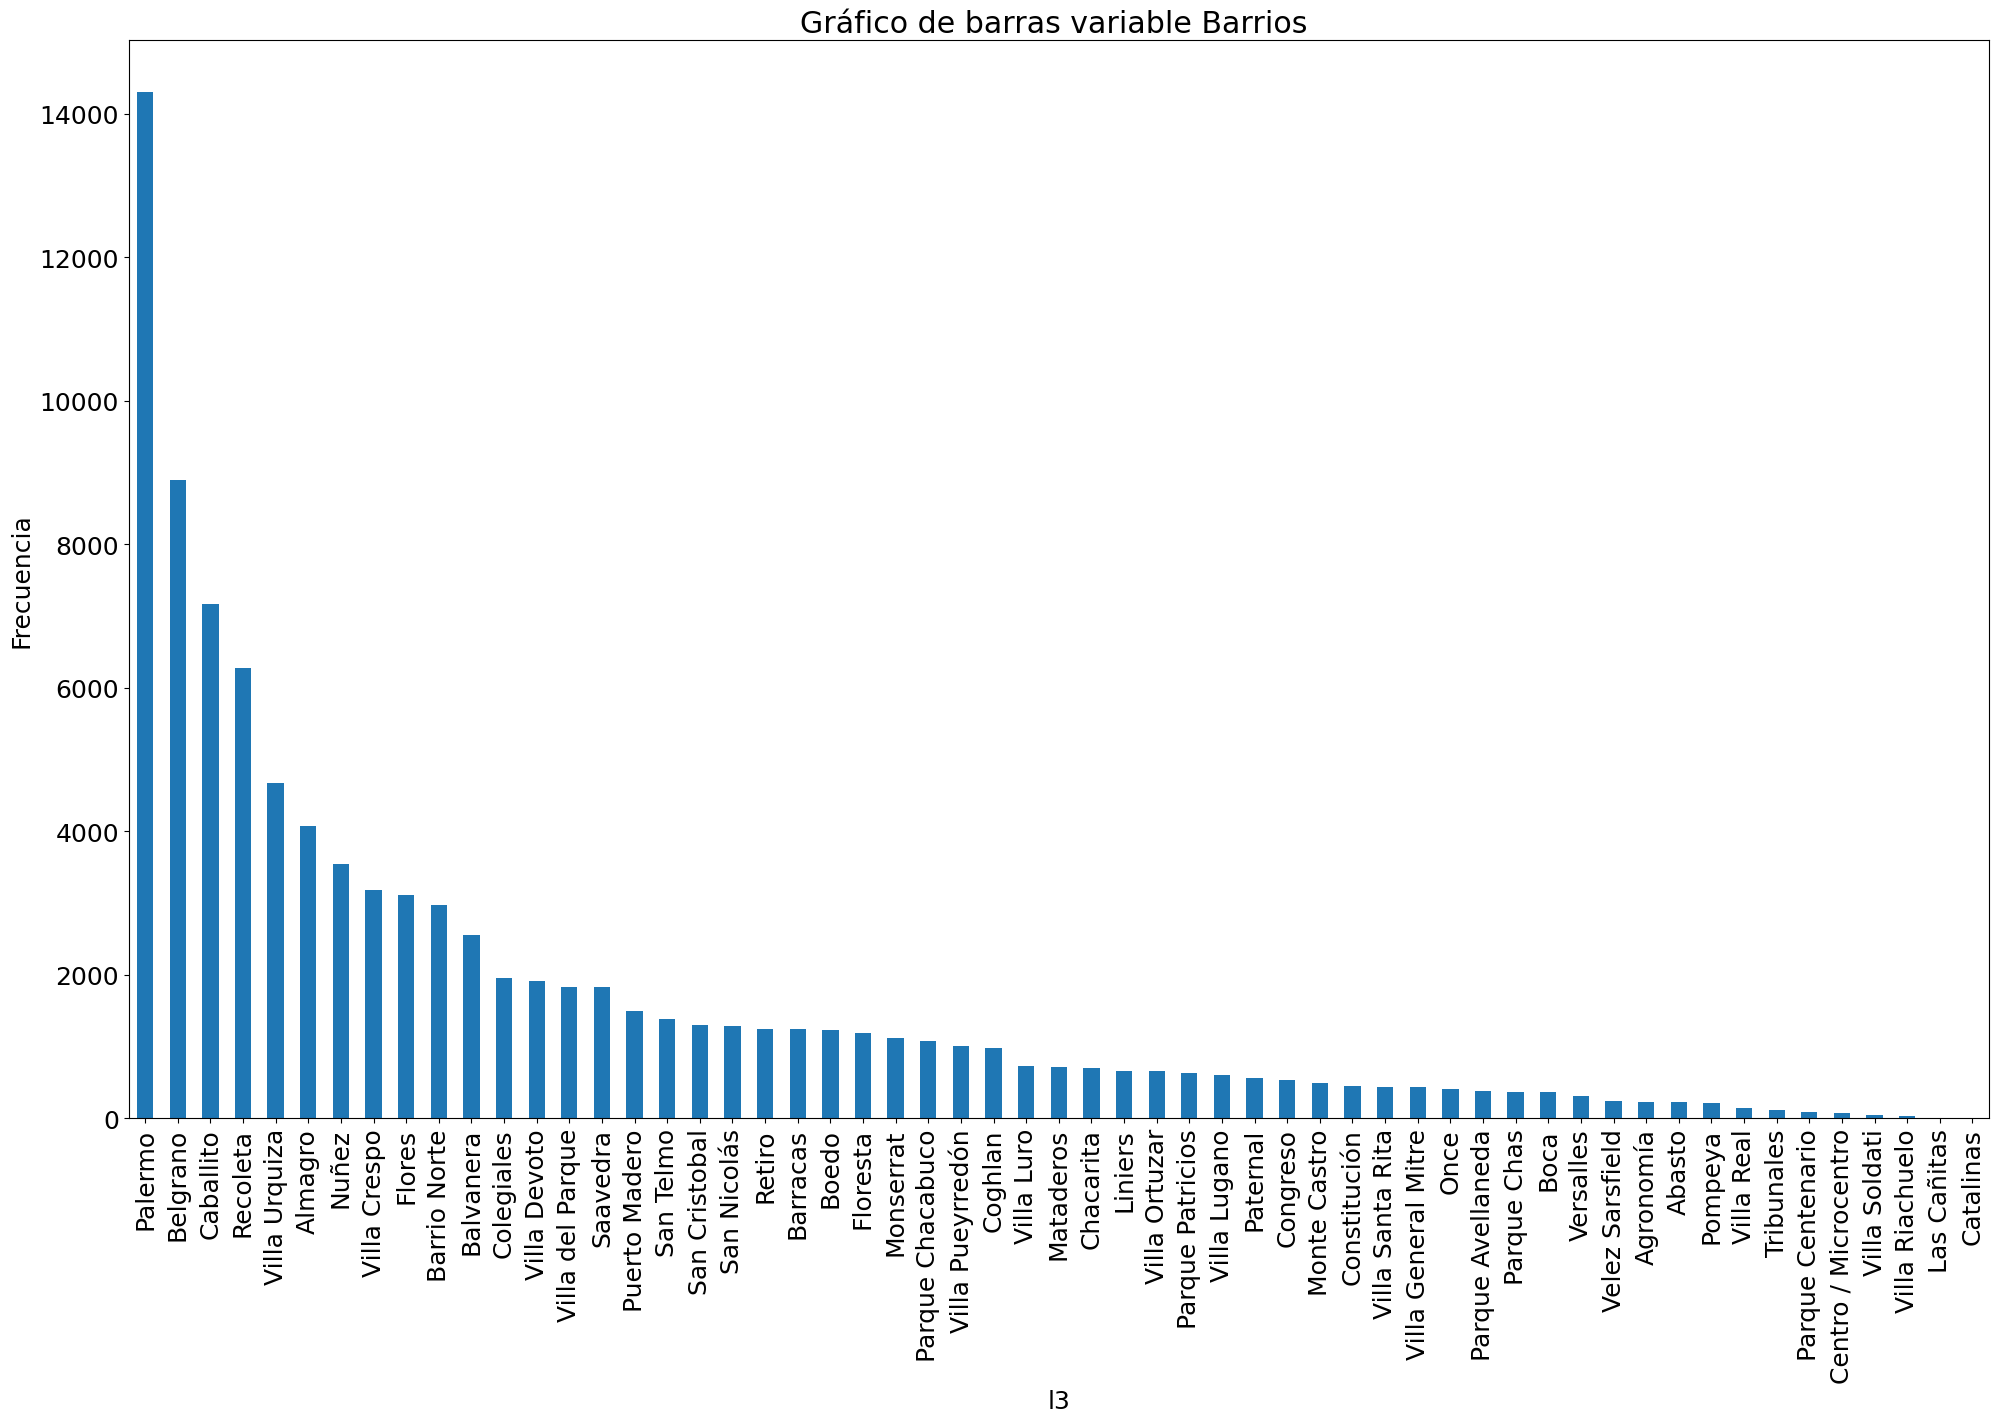

In [24]:
grafico_ciudades = df_filtrado['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Barrios " , xlabel="l3" , ylabel="Frecuencia") 

Gráfico de barras de los barrios, agrupando los barrios menos frecuentes (desde el 5) como "Otros".

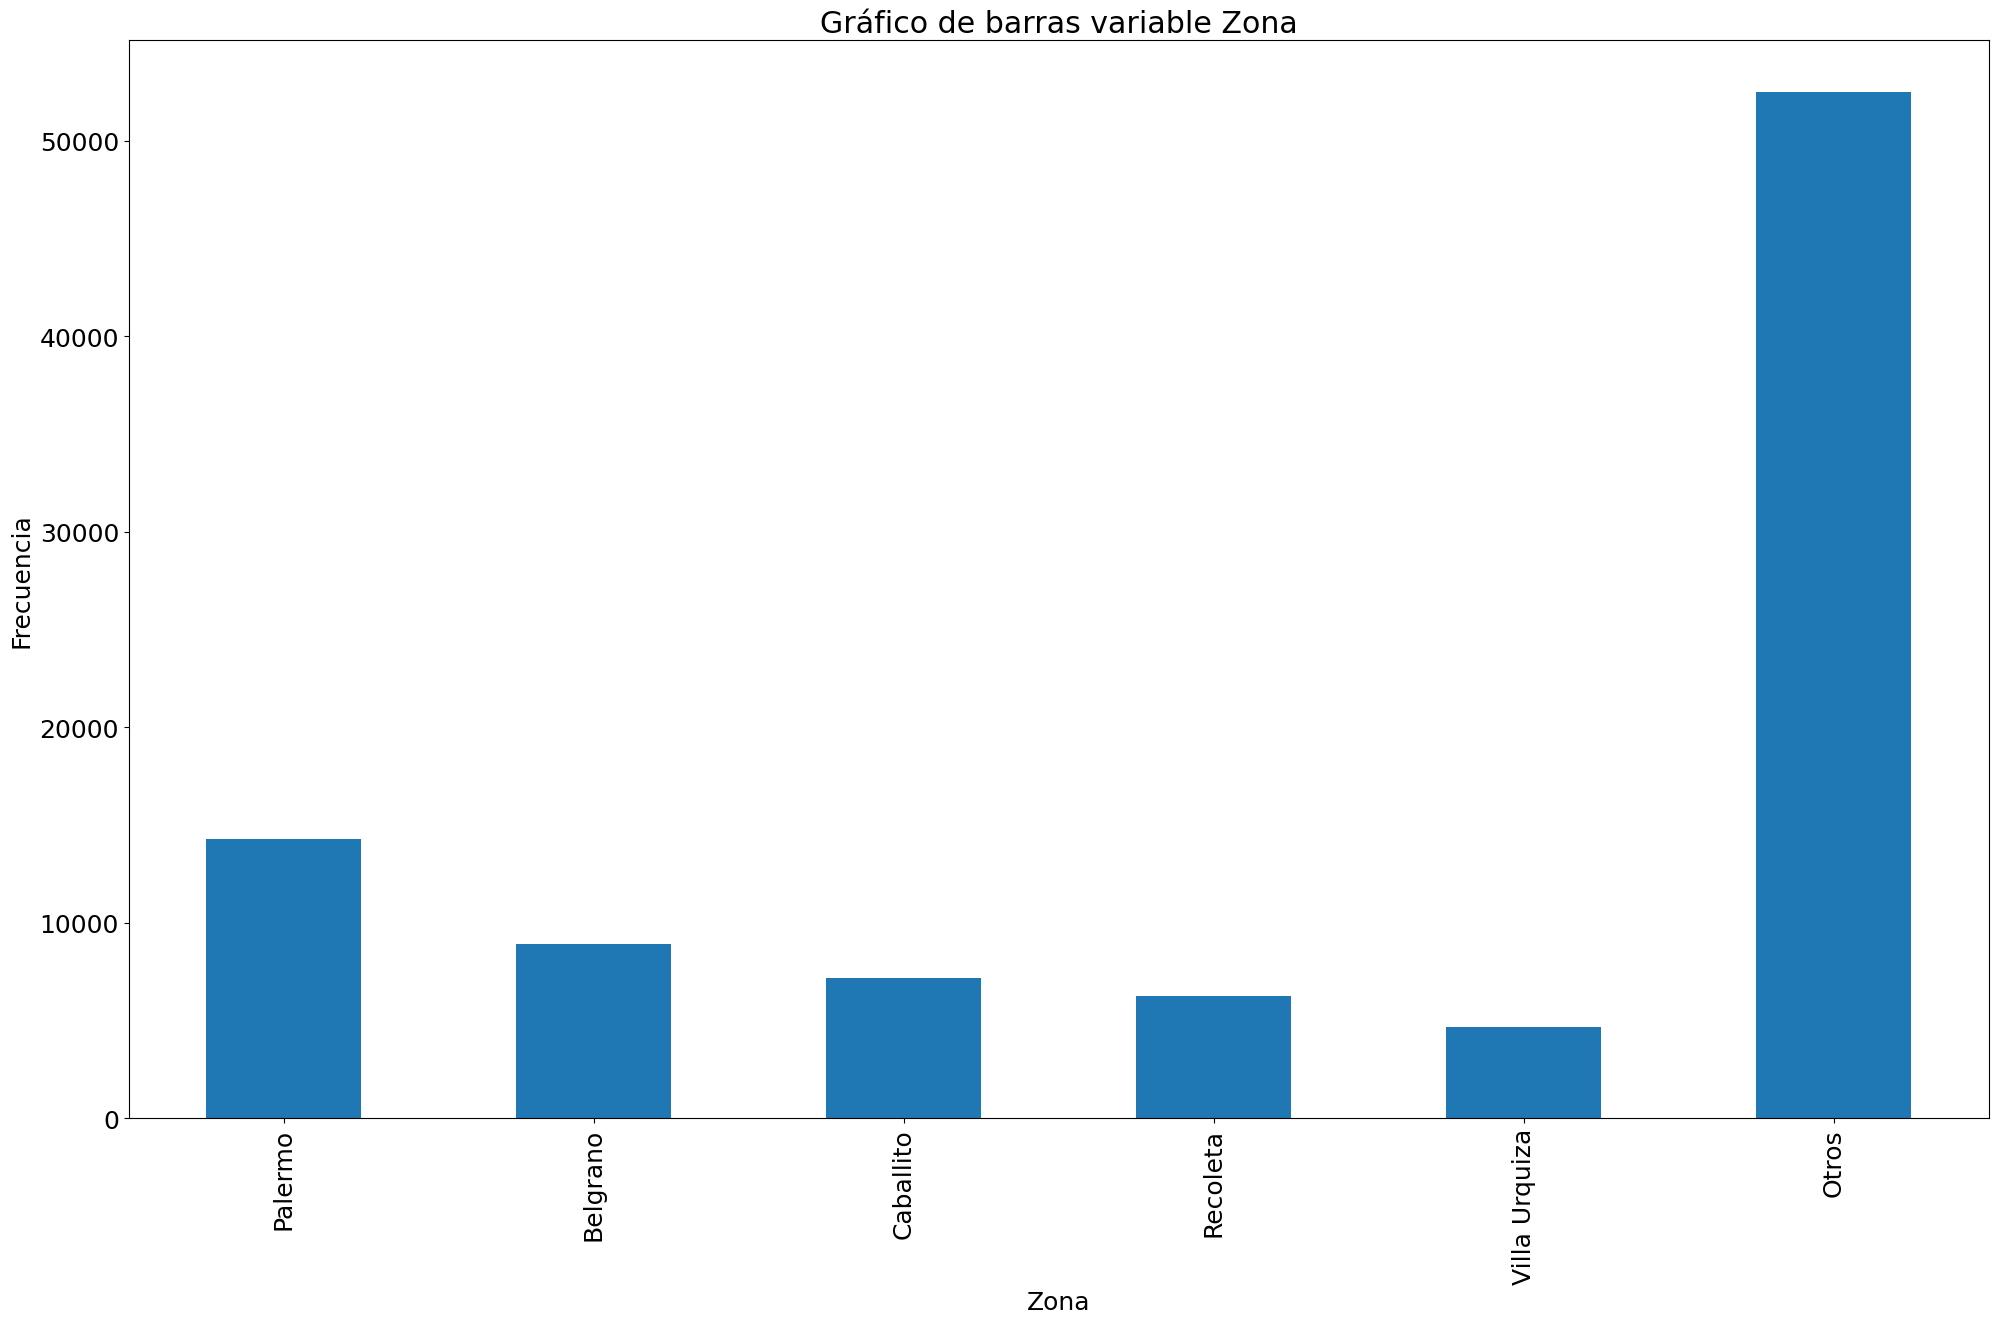

In [25]:
datos_ciudades = df_filtrado['place_l3'].value_counts()[:5]
datos_ciudades['Otros'] = df_filtrado['place_l3'].value_counts()[5:].sum()
grafico_ciudades = datos_ciudades.plot.bar(alpha=1 , title="Gráfico de barras variable Zona" , xlabel="Zona" , ylabel="Frecuencia") 

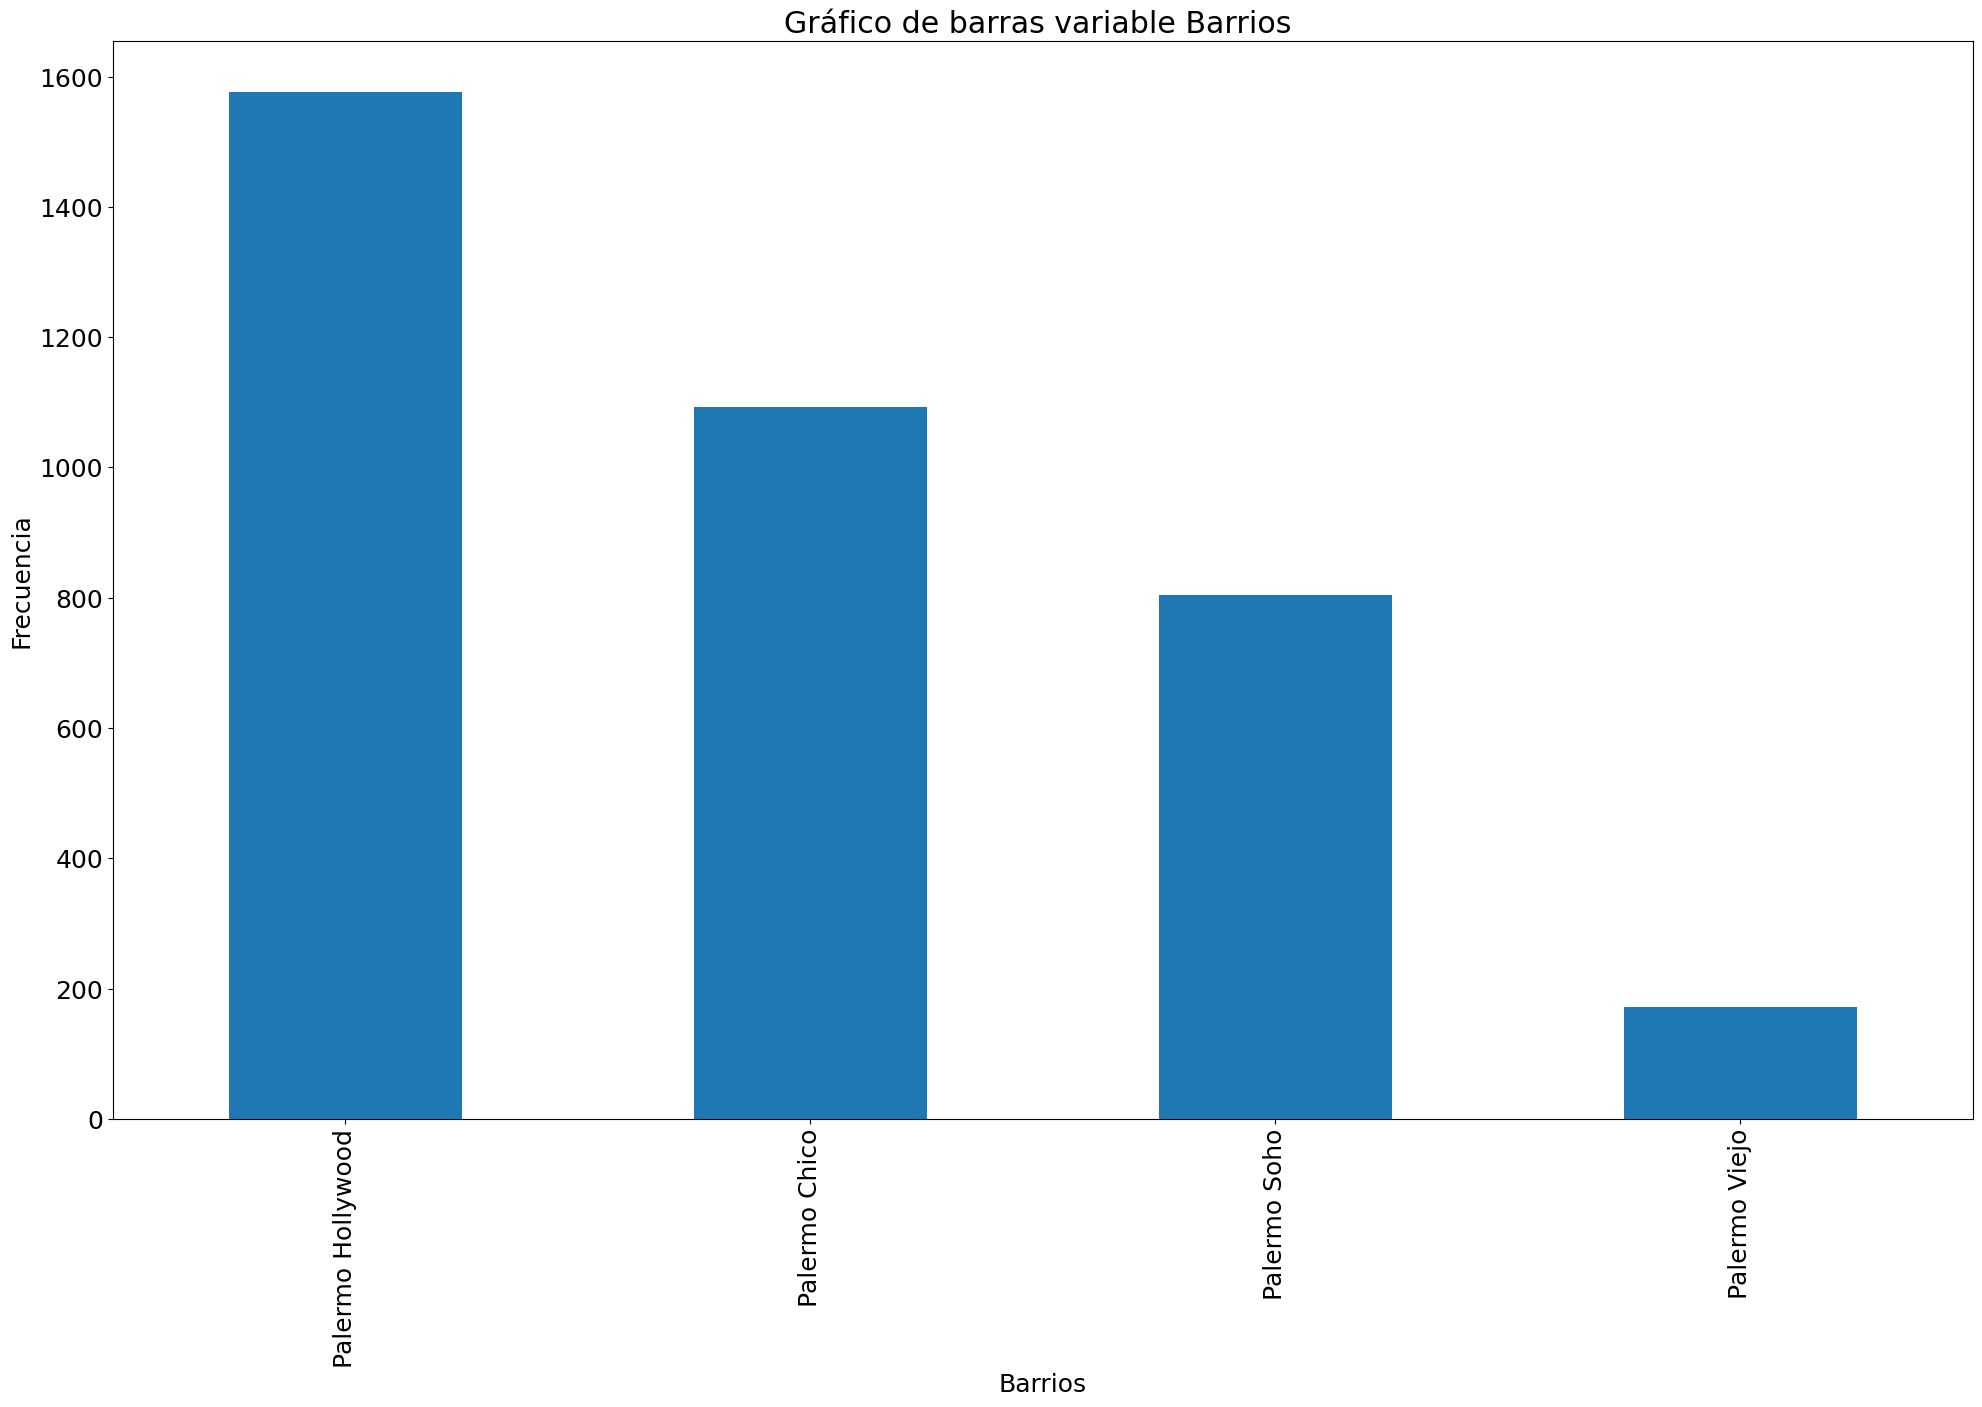

In [26]:
grafico_barrios = df_filtrado['place_l4'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Barrios " , xlabel="Barrios" , ylabel="Frecuencia") 

In [27]:
df_filtrado["place_l4"].value_counts()

Palermo Hollywood    1576
Palermo Chico        1092
Palermo Soho          804
Palermo Viejo         171
Name: place_l4, dtype: int64

In [28]:
df_filtrado["property_type"].value_counts()

Departamento    80829
PH               9266
Casa             4154
Name: property_type, dtype: int64

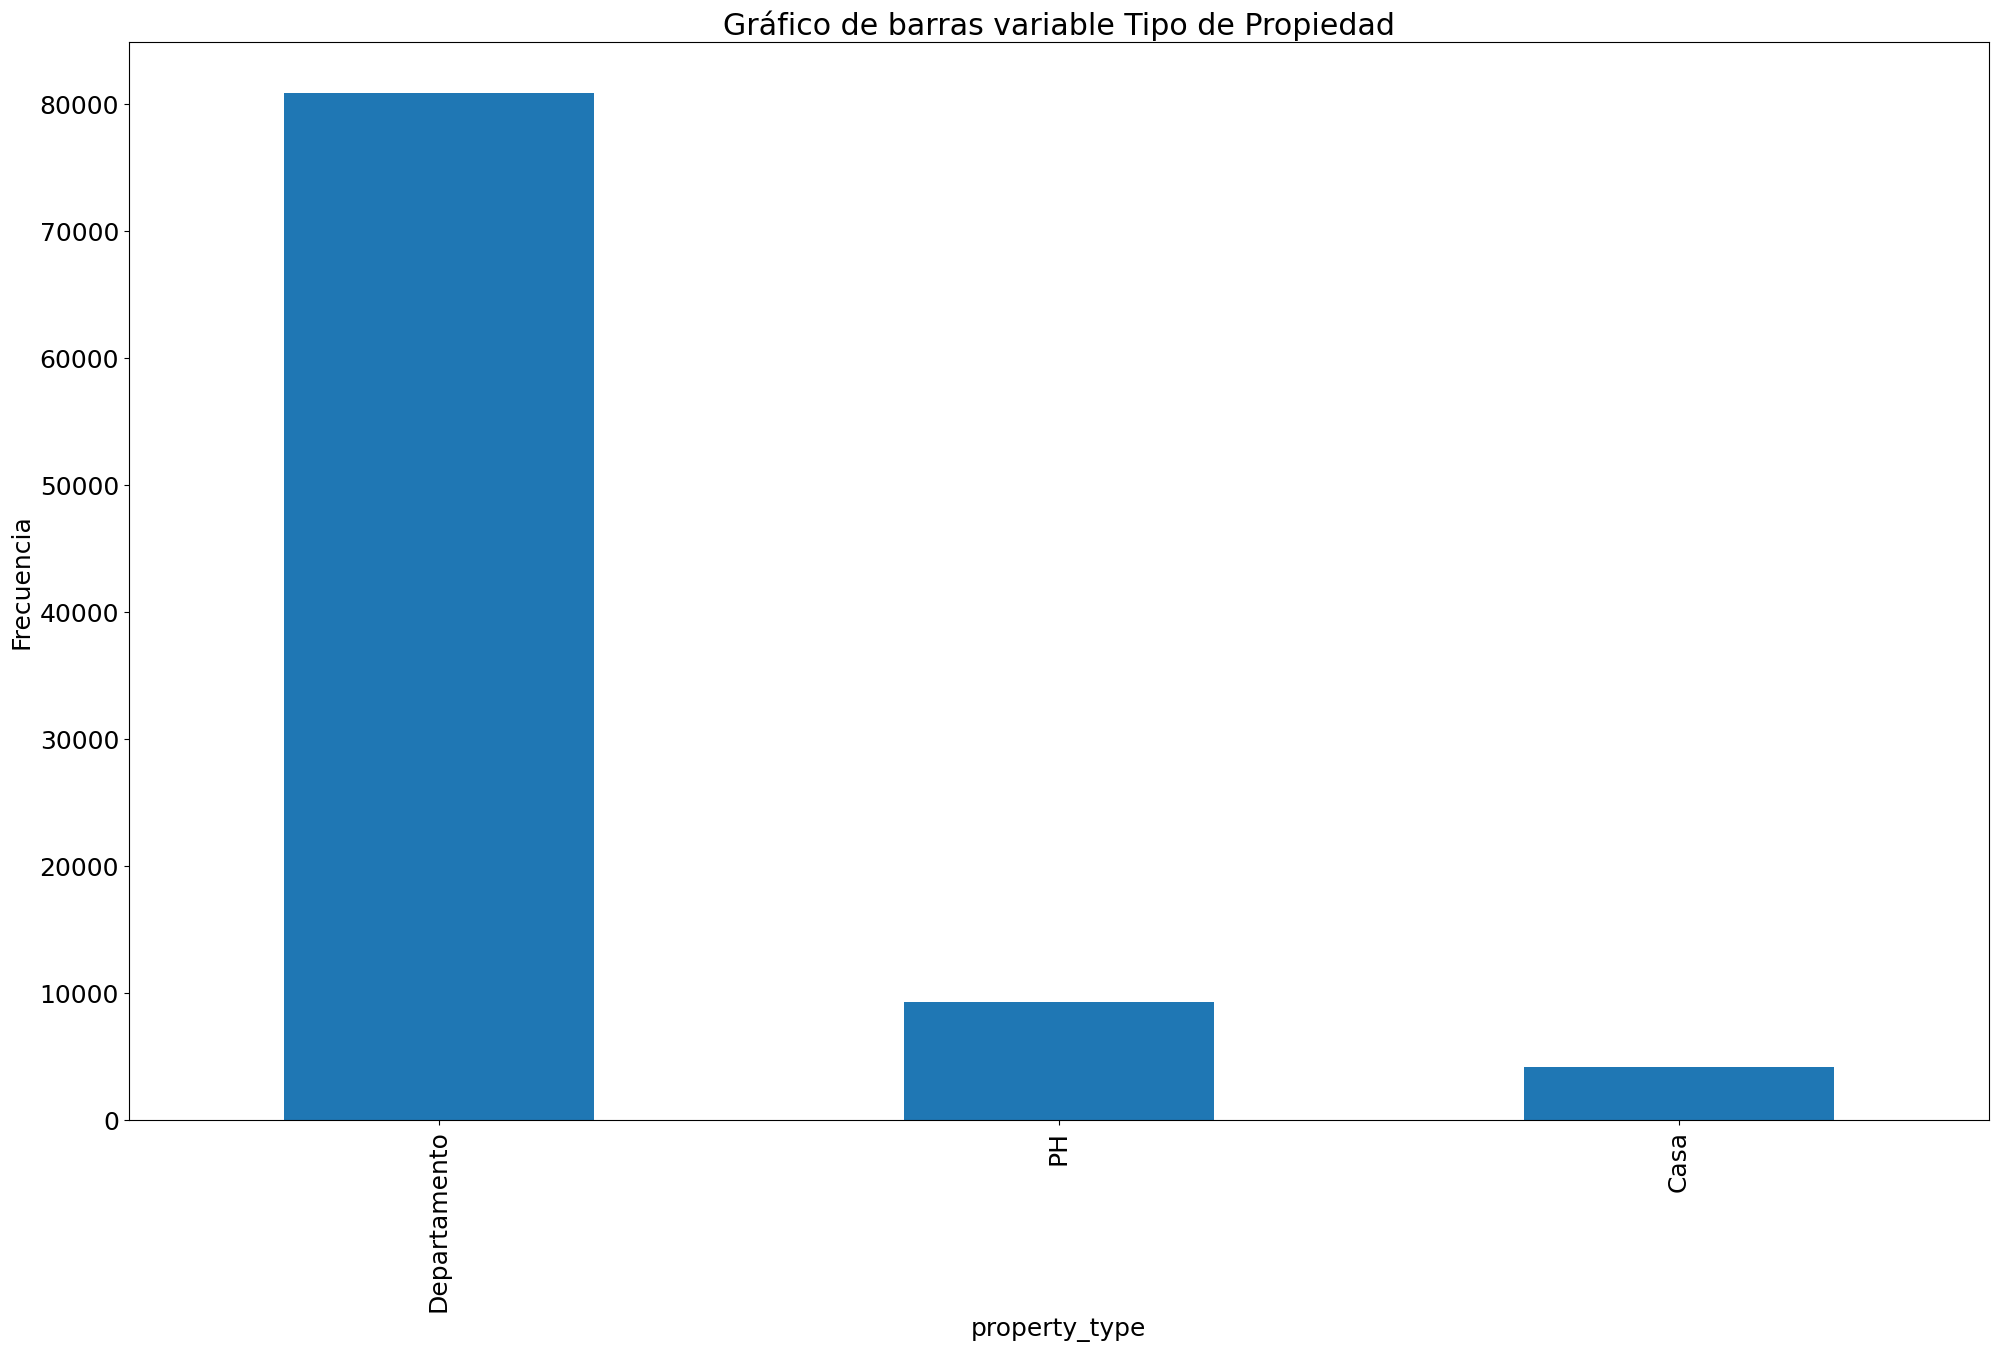

In [29]:
grafico_propiedades = df_filtrado['property_type'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Tipo de Propiedad" , xlabel="property_type" , ylabel="Frecuencia") 

In [30]:
df_filtrado["property_title"].value_counts()

Departamento - Palermo                                       1468
Departamento - Recoleta                                      1324
Departamento - Belgrano                                      1113
Departamento - Caballito                                      936
Departamento - Almagro                                        666
                                                             ... 
PH 3 ambientes y medio - Saavedra                               1
VENTA PH 4 AMBIENTES COGHLAN PATIO TERRAZA SIN EXPENSAS         1
1 - Migueletes  900                                             1
PH de 3 amb. en esquina con 2 entradas independientes.          1
Departamento 81 m2 - San Telmo 2 Amb, Terracita! Luminoso       1
Name: property_title, Length: 55704, dtype: int64

In [31]:
df_filtrado["property_title"].value_counts().size

55704

Se observa que hay 55784 diferentes títulos publicados, por lo que se mostrarán los 9 más frecuentes y los demás serán agrupados como otros

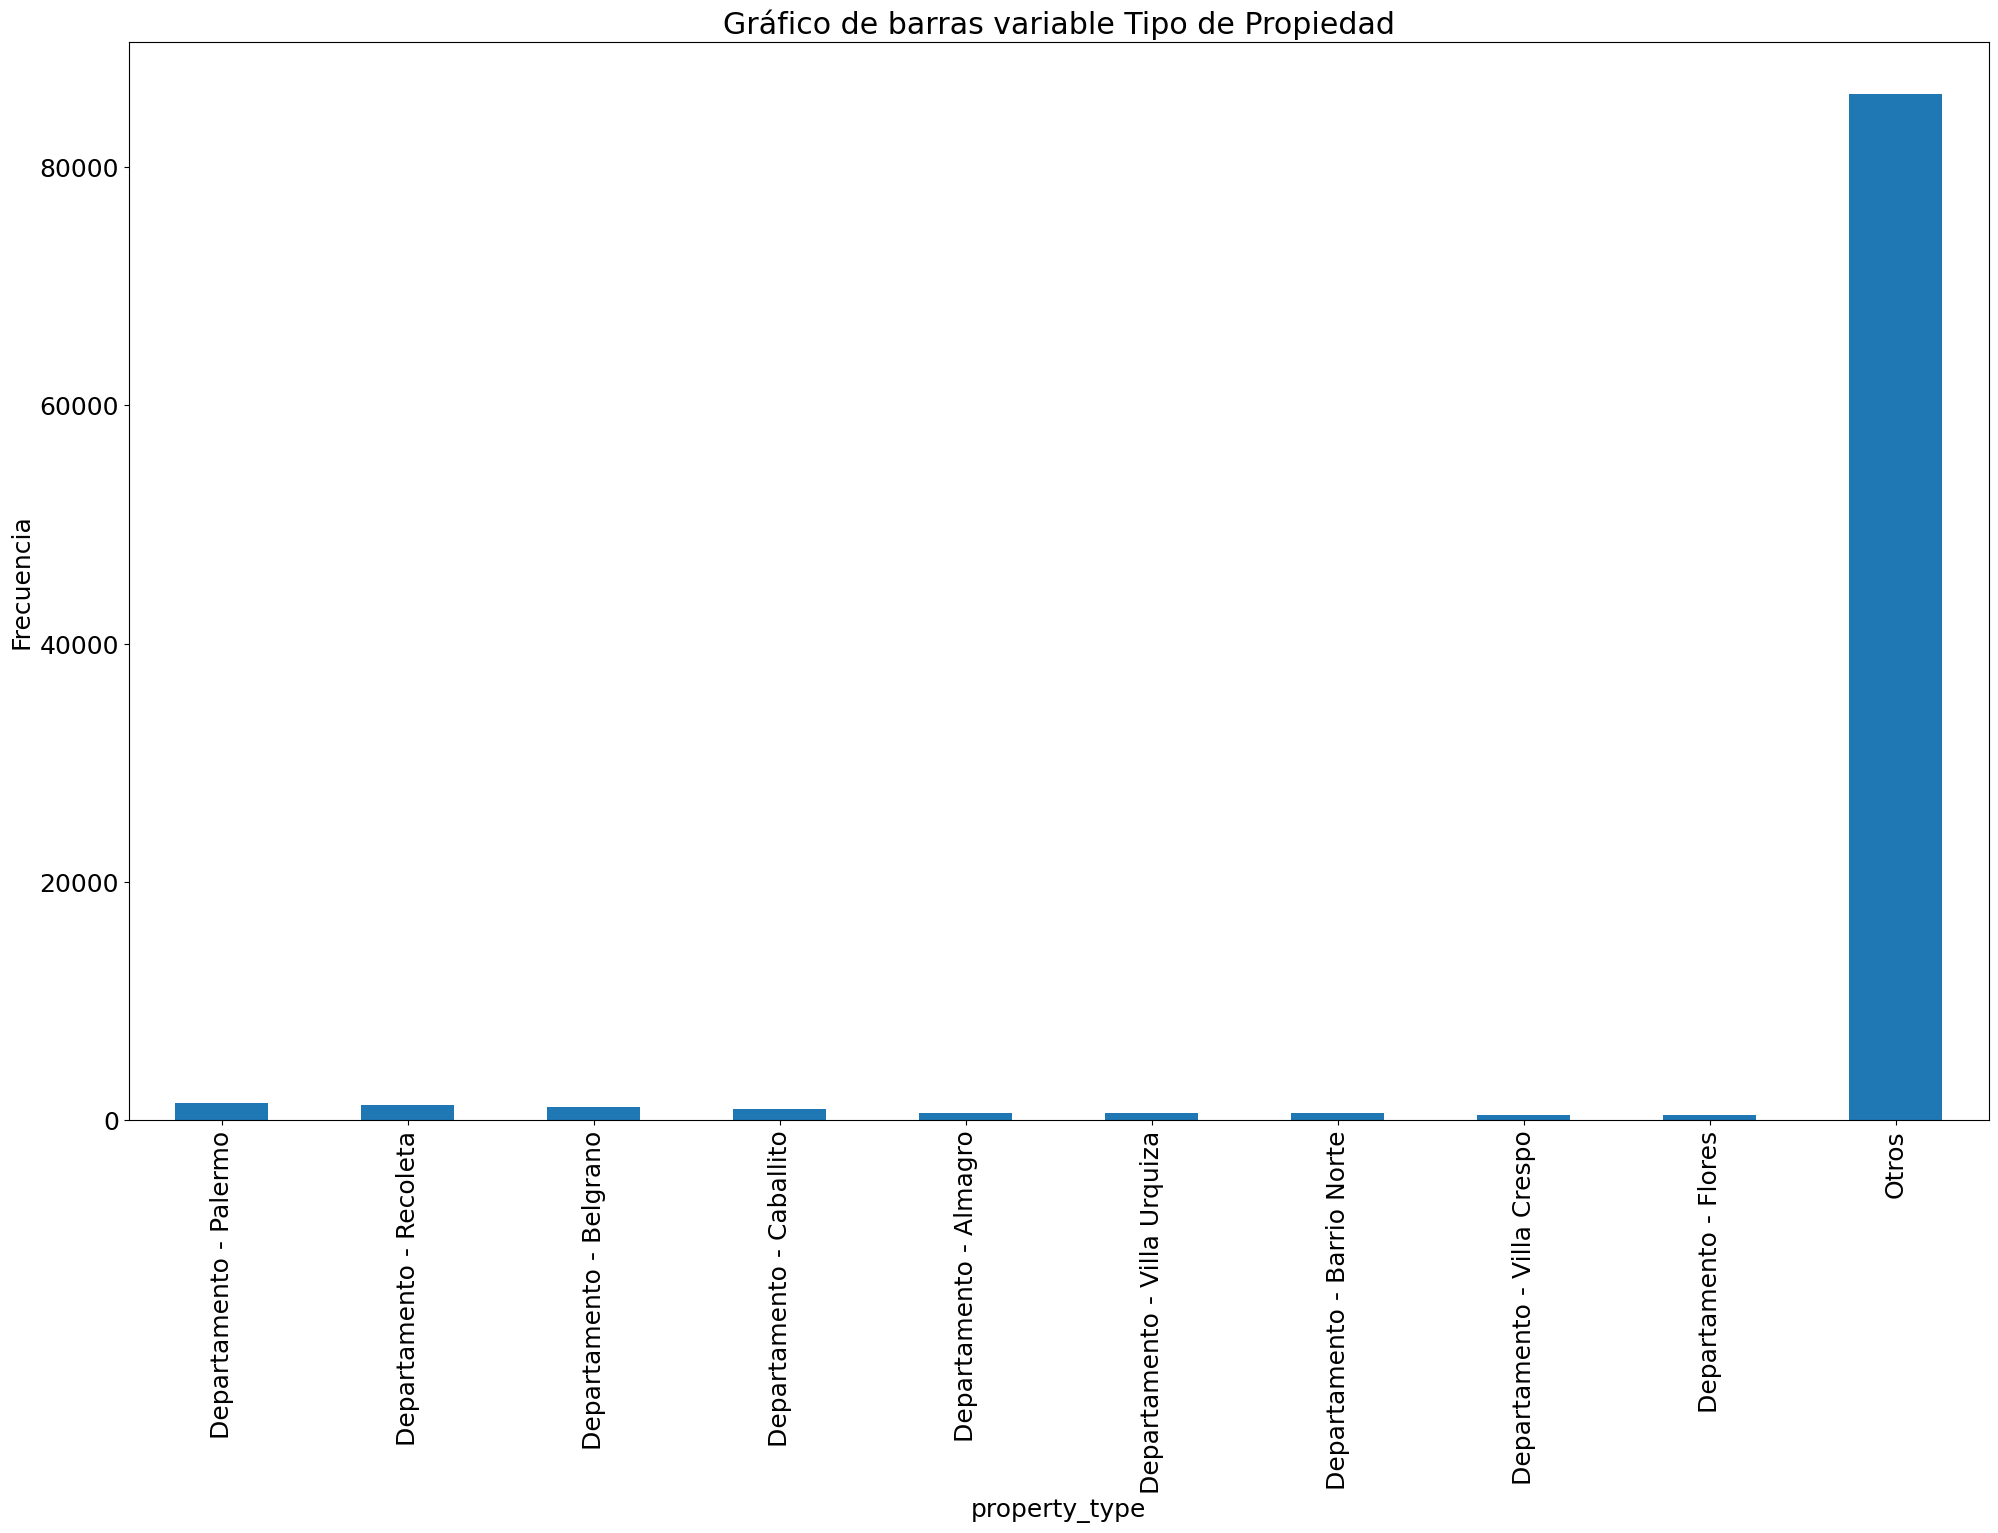

In [32]:
titulo_propiedades = df_filtrado['property_title'].value_counts()[:9]
titulo_propiedades['Otros'] = df_filtrado['property_title'].value_counts()[10:].sum()
grafico_titulo_propiedades = titulo_propiedades.plot.bar(alpha=1 , title="Gráfico de barras variable Tipo de Propiedad" , xlabel="property_type" , ylabel="Frecuencia") 

### Realizar un análisis gráfico de las distribuciones de las variables

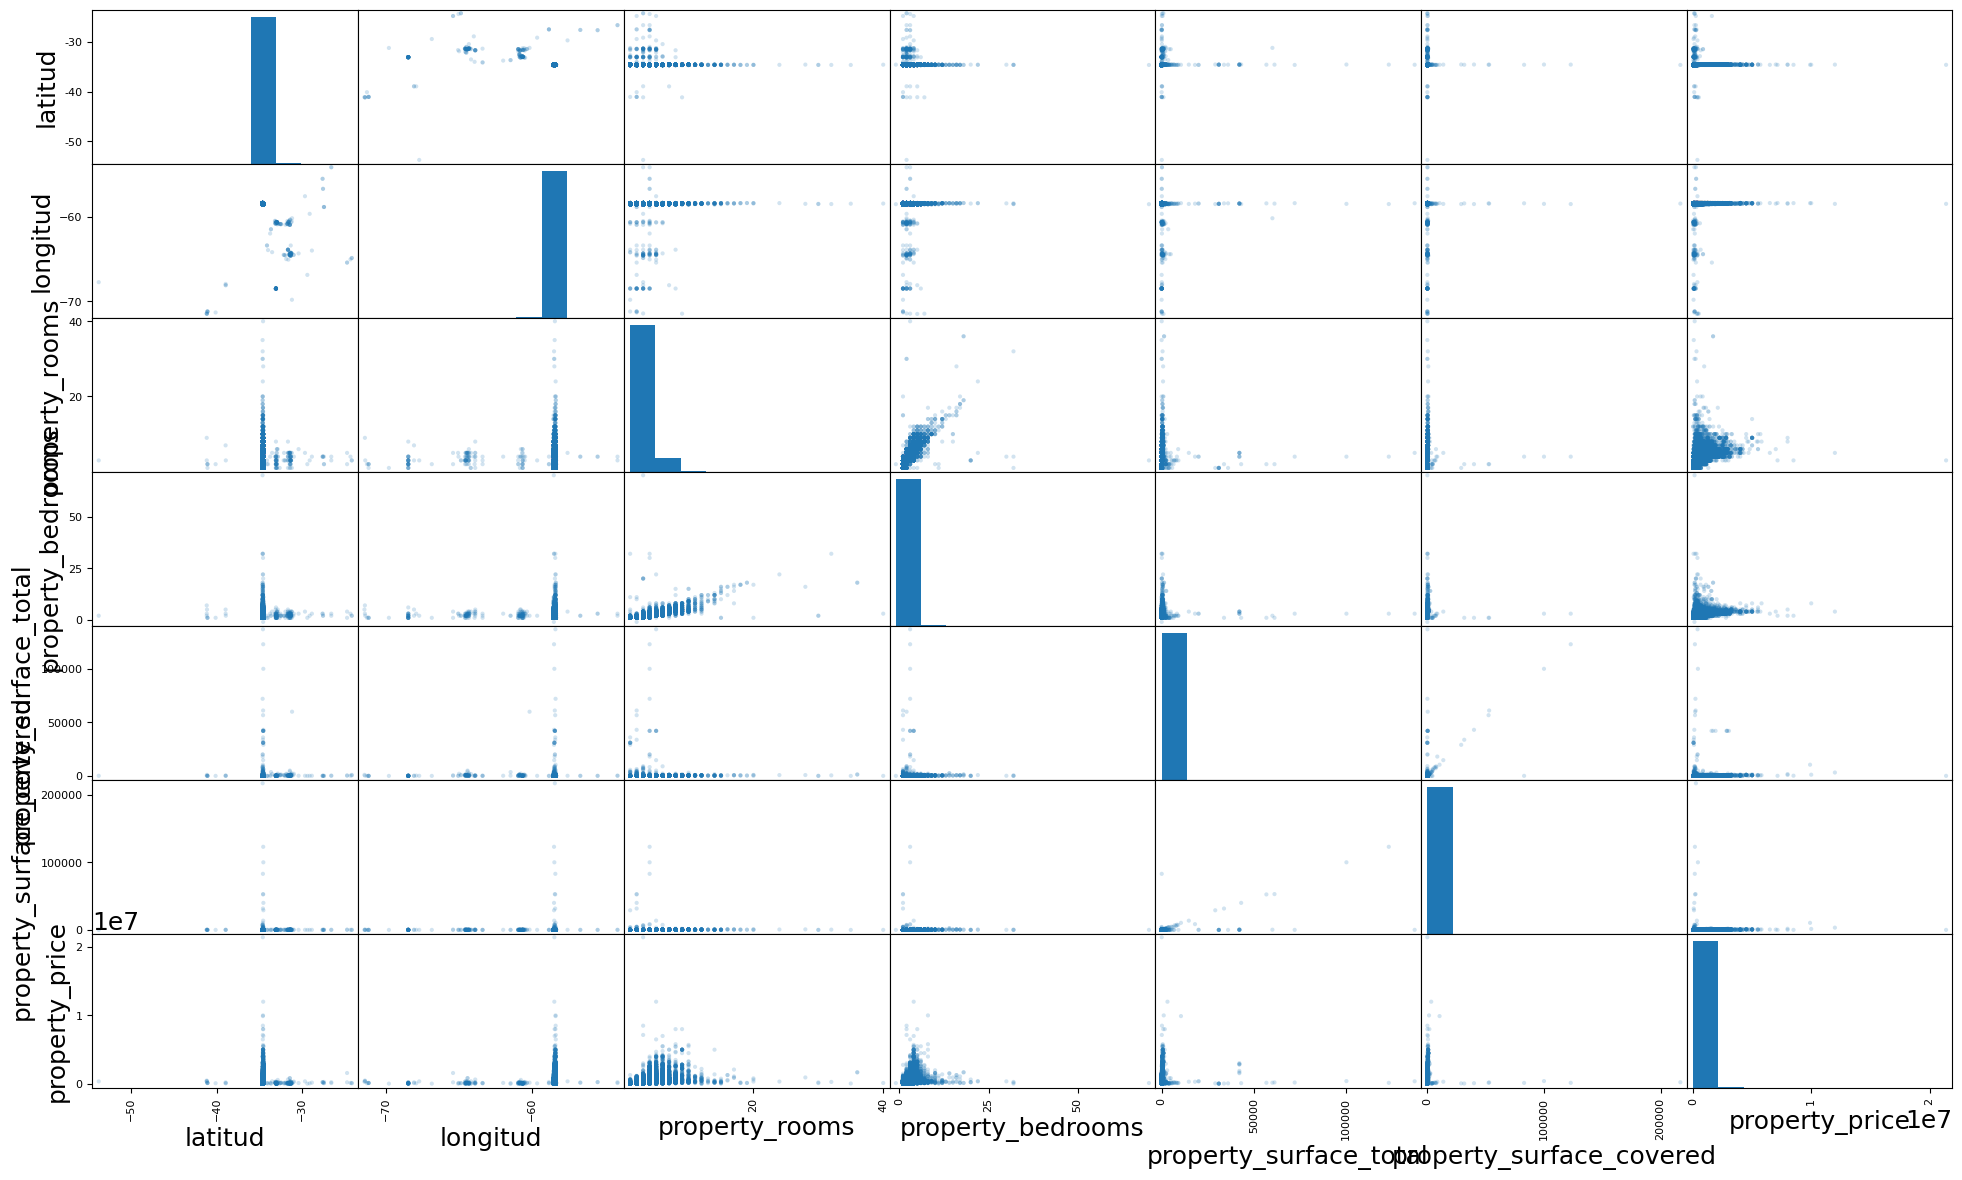

In [33]:
columns=df_filtrado.columns.tolist()
ds_scatter_matrix=df_filtrado[columns].copy()
scatter_matrix(ds_scatter_matrix, alpha=0.2);

### Analizar las correlaciones existentes entre las variables

Para el análisis de las correlaciones entre variables, se optó por el uso de la matriz de correlación. Además de un heatmap complementario con dichos valores, que es más atractivo visualmente dado que los colores permiten a simple vista ver las mayores correlaciones.

In [34]:
df_filtrado.drop(['latitud', 'longitud'],axis=1).corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
property_rooms,1.000000,0.871940,0.067211,0.076097,0.488934
property_bedrooms,0.871940,1.000000,0.067702,0.075075,0.425386
property_surface_total,0.067211,0.067702,1.000000,0.604311,0.085235
property_surface_covered,0.076097,0.075075,0.604311,1.000000,0.056238
property_price,0.488934,0.425386,0.085235,0.056238,1.000000


<AxesSubplot:>

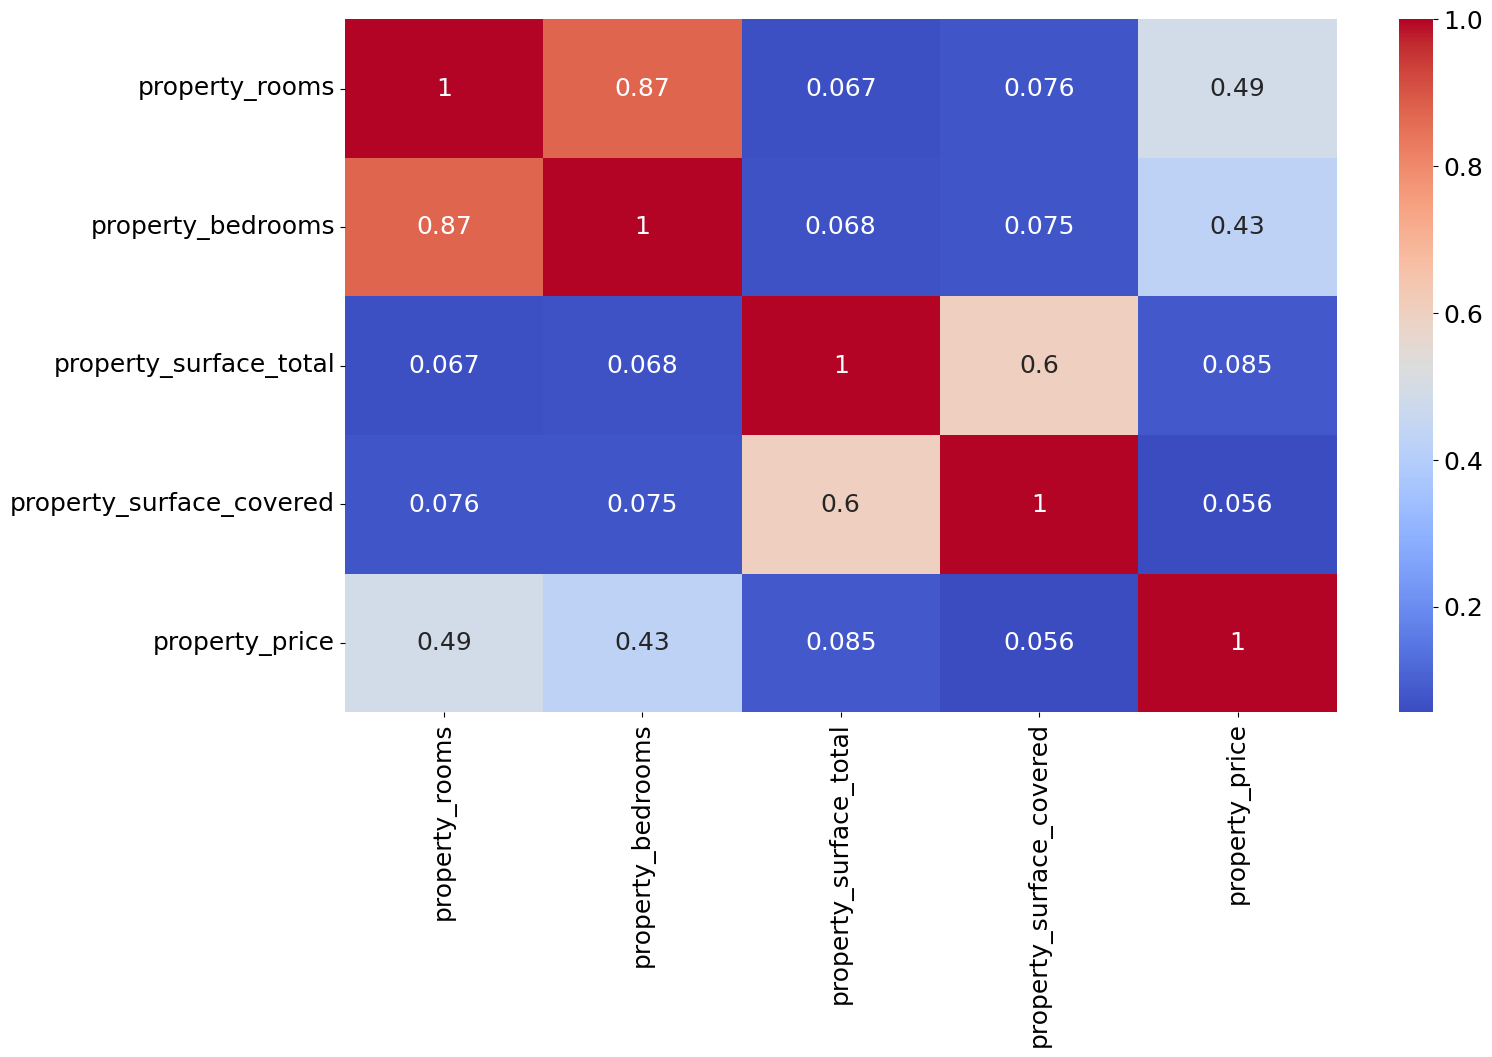

In [35]:

plt.figure(figsize = (16,9))
sns.heatmap(df_filtrado.drop(['latitud', 'longitud'], axis=1).corr(), annot = True, cmap='coolwarm')

Se observa que hay una fuerte relacion entre la cantidad de habitaciones y ambientes disponibles en una propiedad. Asi como tambien, como es predecible, la superficie cuvierta, y la total cubierta estan relacionadas entre si, aunque no tanto como en la relacion entre habitaciones y ambientes.

### Conclusiones sobre los datos

En conclusión de las variables cualitativas la mayor frecuencia de inmobiliario en venta son departamentos, mayormente ubicados en Palermo, dentro del barrio Palermo Hollywood.


## Ejercicio 1b: Preprocesamiento

### Analisis de datos faltantes a nivel de fila

In [ ]:
filas_totales=df_filtrado.shape[1]
filas_faltantes = df_filtrado.isnull().sum(axis=1)/filas_totales*100 
filas_faltantes = filas_faltantes[filas_faltantes > 0]
#filas_faltantes.sort_values(ascending=False)
filas_faltantes.size

91828

Se observan que hay 91828 filas con datos faltantes

In [57]:
filas_faltantes.size/df_filtrado.shape[0]*100


97.43127248034462

De los cuales representan el 97.43% de las observaciones totales del dataset

In [66]:
filas_muy_faltantes = filas_faltantes[filas_faltantes > 34]
filas_muy_faltantes.size/filas_faltantes.size*100


0.22868841747615107

Además, se observa que menos del 1% de dichas filas con campos faltantes, tienen más del 33% de sus campos con datos faltantes, que representarían más de 4 campos.

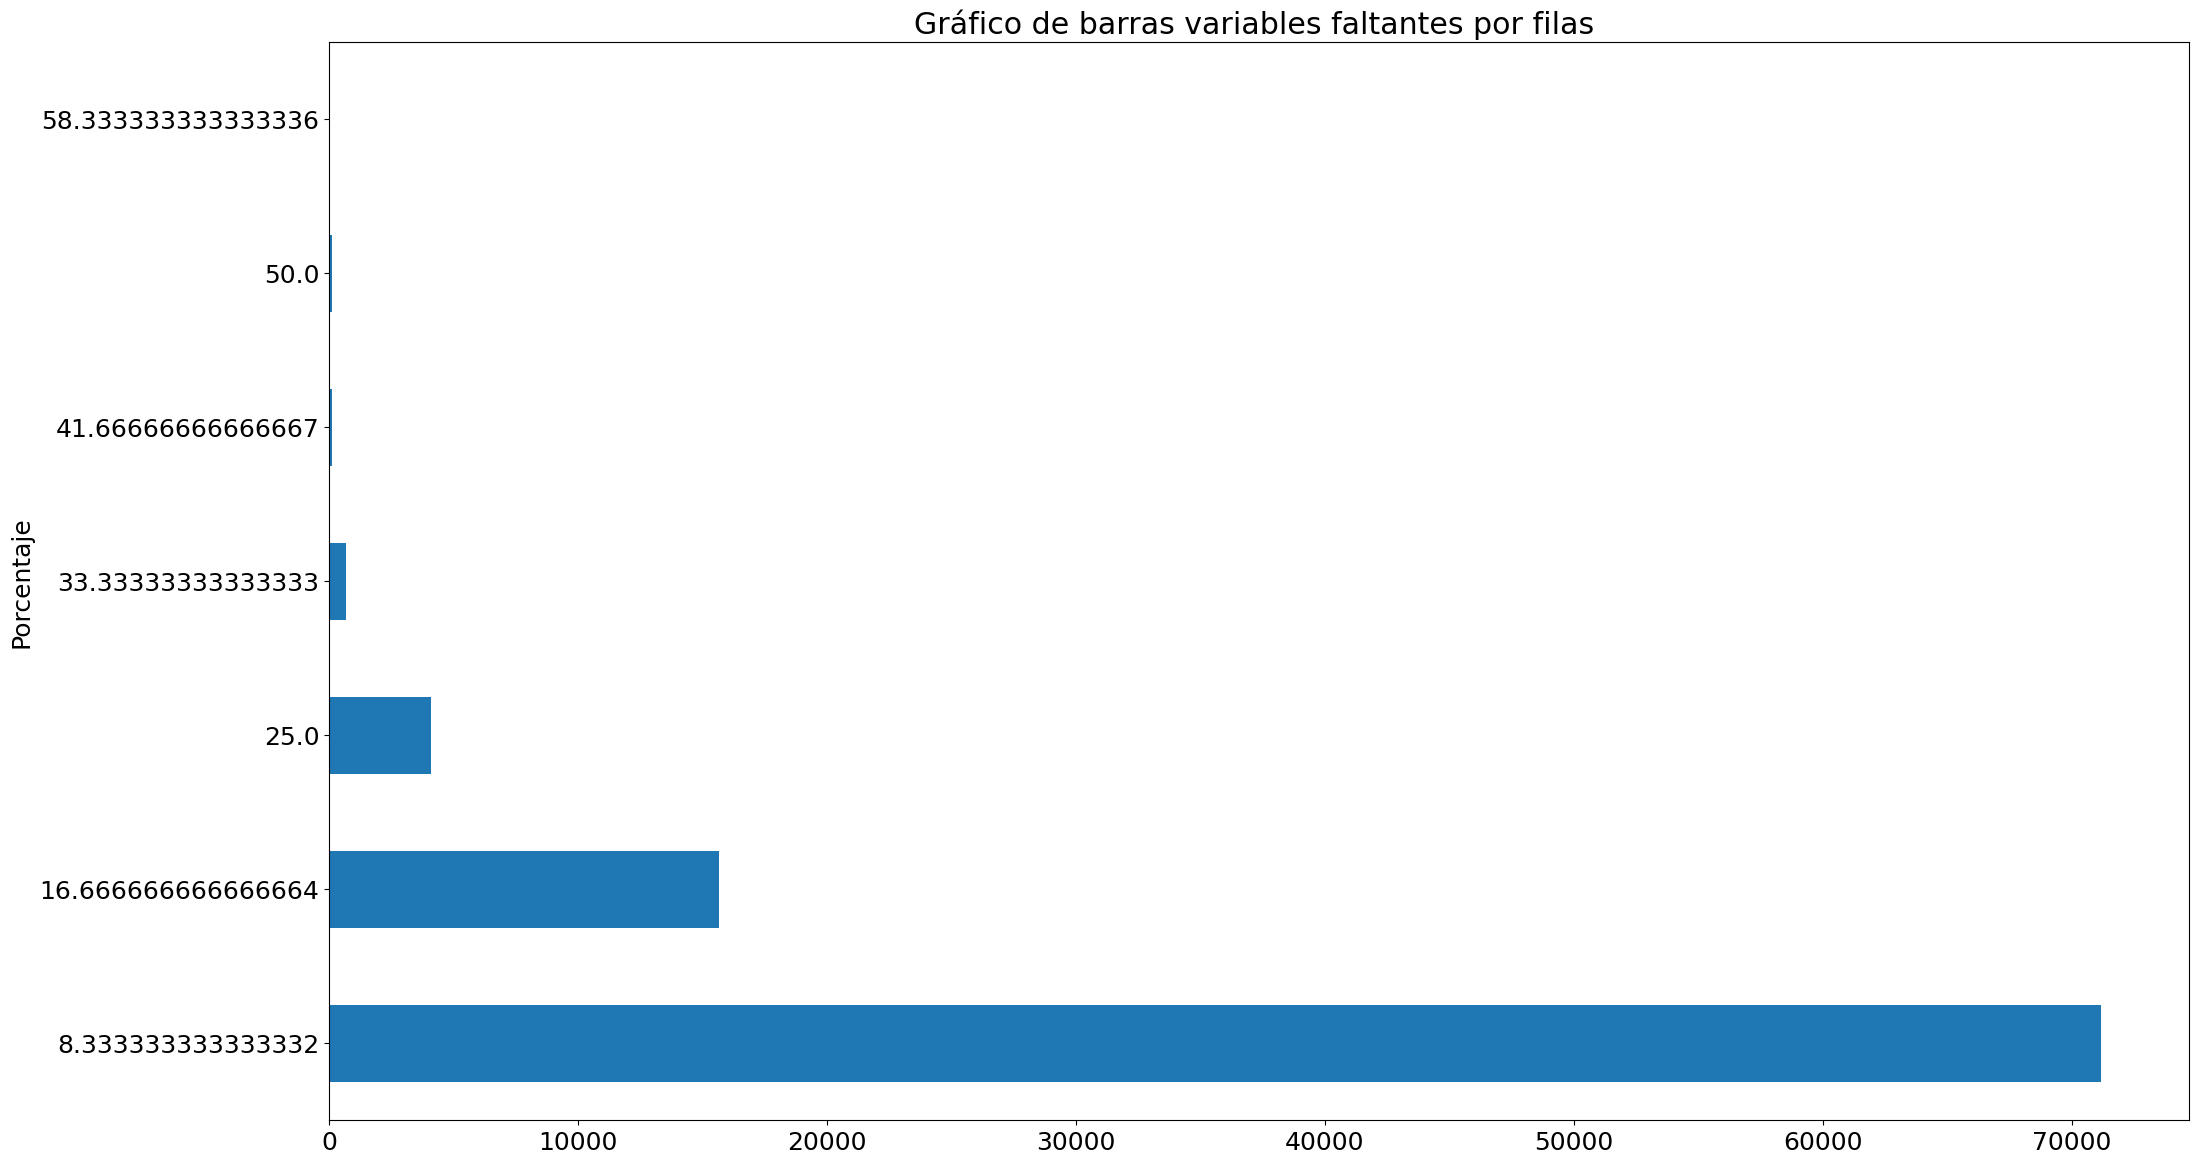

In [165]:
#Gráfico
graf_filas_faltantes = filas_faltantes.value_counts().plot.barh(alpha=1 , title="Gráfico de barras variables faltantes por filas " , xlabel="Porcentaje" , ylabel="cantidad de filas")

Con este gráfico se puede observar que al menos 70.000 filas tienen un 8% de datos nulos

### Analisis de datos faltantes a nivel de columna

In [81]:
columnas_totales=df_filtrado.shape[0]
columnas_faltantes = df_filtrado.isnull().sum(axis=0)/columnas_totales*100
columnas_faltantes = columnas_faltantes[columnas_faltantes > 0]
columnas_faltantes.size


8

Se observan que hay 8 columnas con datos faltantes.

In [91]:
columnas_faltantes.size/df_filtrado.shape[1]*100

66.66666666666666

El 66,67% de las columnas totales del dataset

In [100]:
columnas_muy_faltantes = columnas_faltantes[columnas_faltantes > 34]
columnas_muy_faltantes.size/columnas_faltantes.size*100

12.5

El 12,5% de las columnas con datos faltantes tiene mas del 33% de sus campos con datos faltantes. 

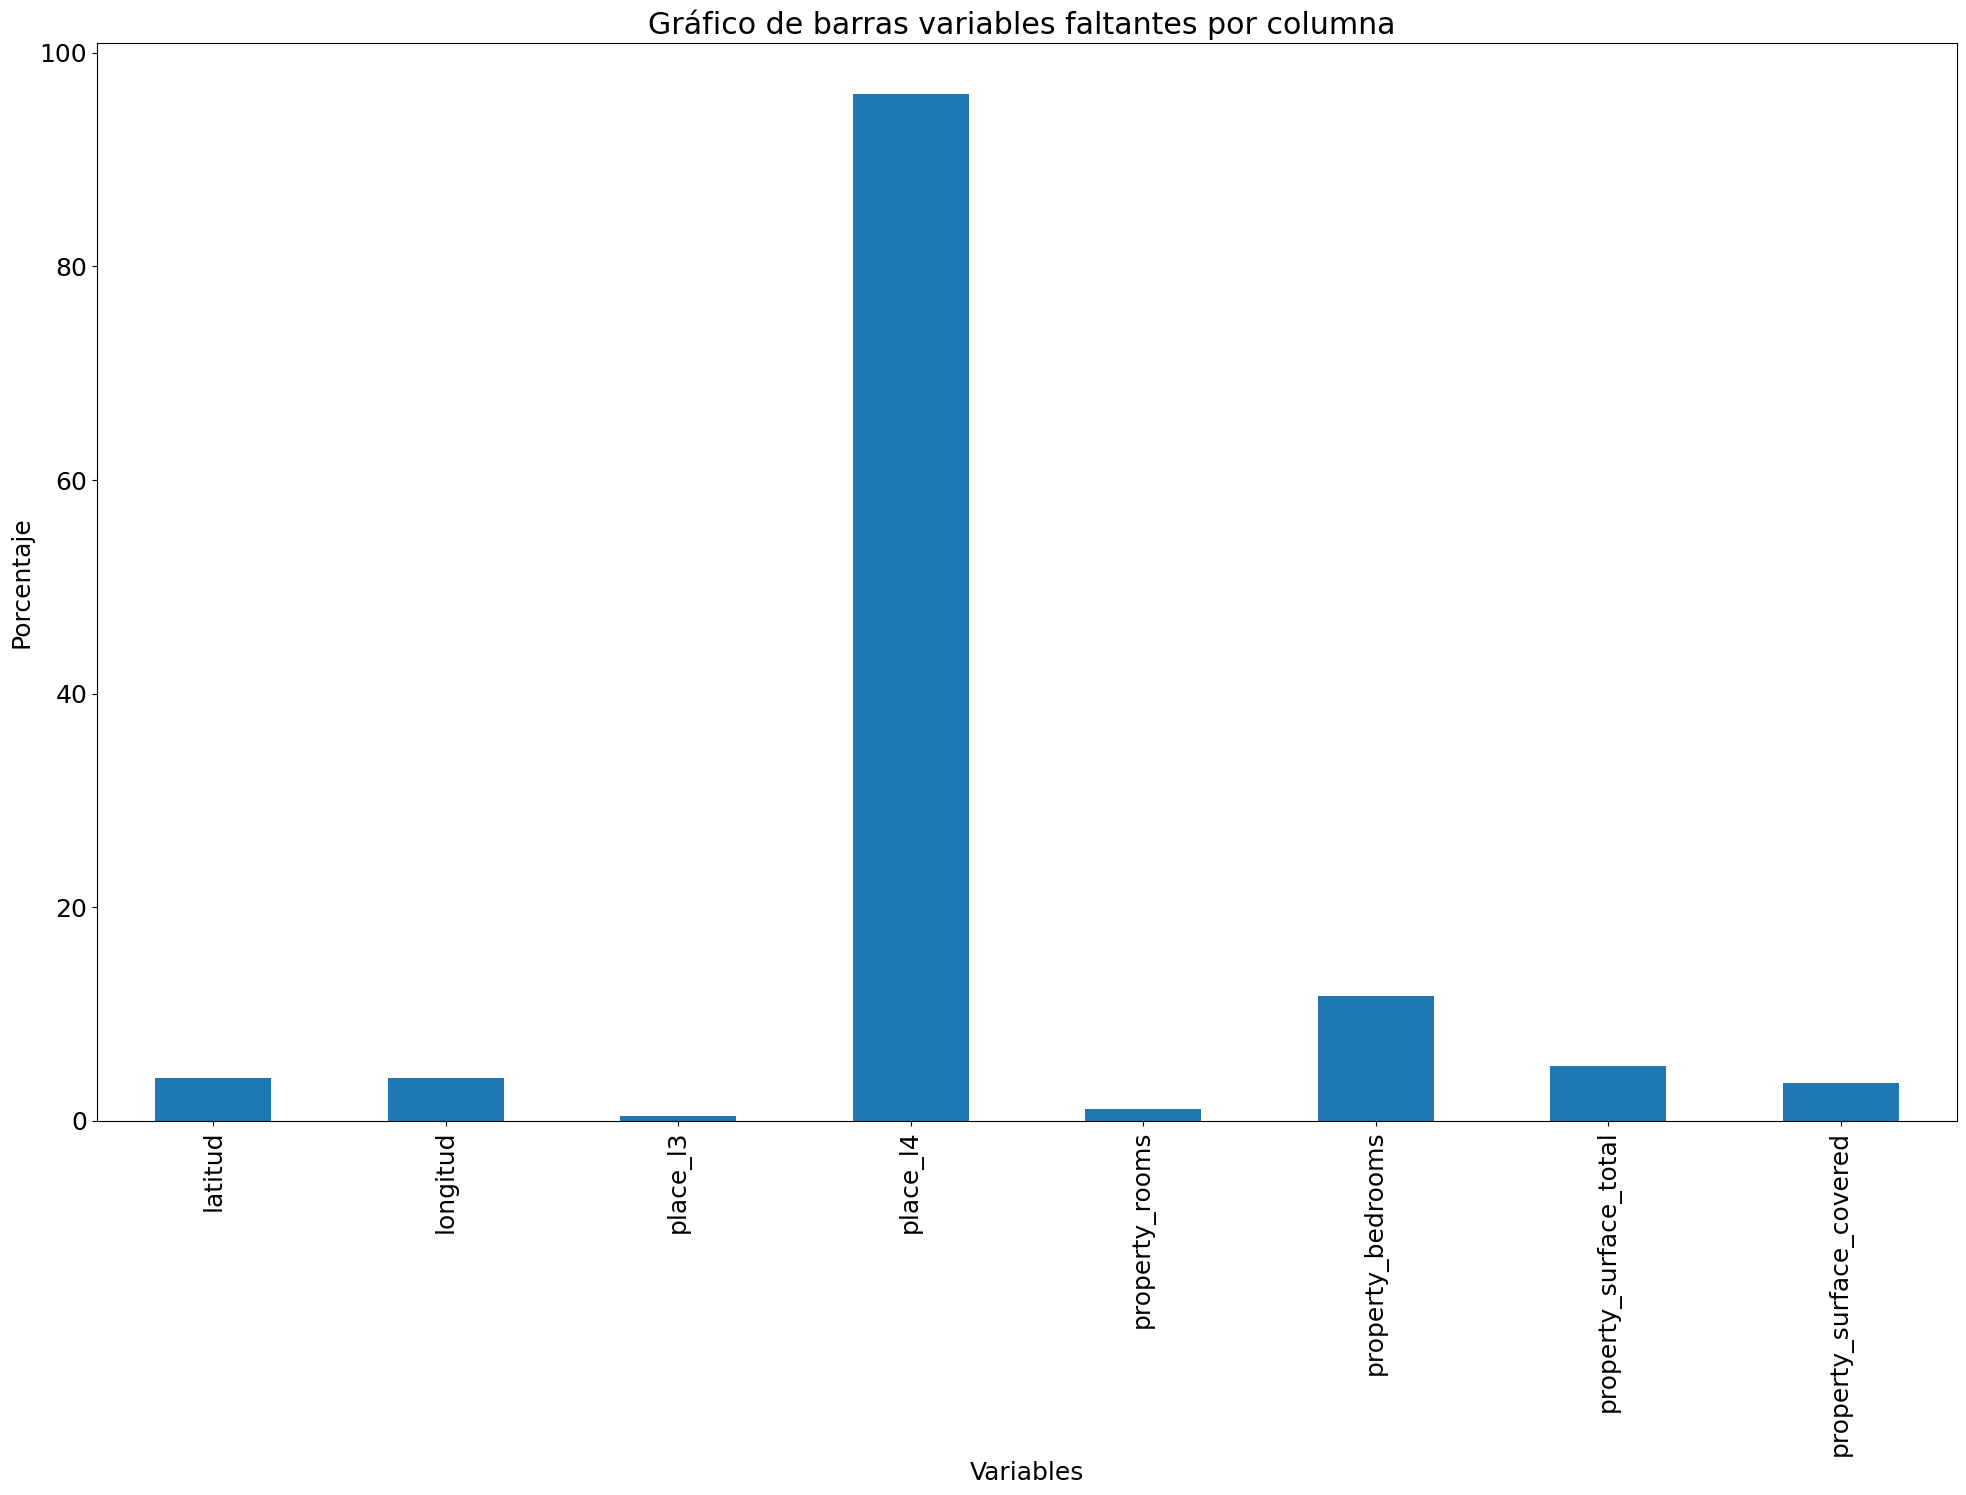

In [136]:
#Gráfico

grafico_col_faltantes = columnas_faltantes.plot.bar(alpha=1 , title="Gráfico de barras variables faltantes por columna " , xlabel="Variables" , ylabel="Porcentaje") 

Gracias a este gráfico podemos saber que la columna con más datos faltantes es 'place_l4'

### Estrategias para reparar valores faltantes

Opción 0: eliminarlos del dataset

In [96]:
df_eliminar_nans_0 =  df_filtrado.copy()
df_eliminar_nans_0.dropna(inplace=True)
df_eliminar_nans_0.shape
df_eliminar_nans_0.isnull().sum()

latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

In [98]:
pdf_eliminar_nans_0.shape[0]/df_filtrado.shape[0]*100

2.568727519655381

Se observa que de esta forma, al eliminar todas las filas con NA's, sobrevivió sólo menos del 3% de las observaciones originales.

Opción 1: tratar los NaNs como su propia categoria o valor

In [97]:
df_eliminar_nans_1=df_filtrado.copy()
df_eliminar_nans_1['latitud'] =df_eliminar_nans_1['latitud'].fillna(999999999) #999999999 = no existe
df_eliminar_nans_1['longitud'] = df_eliminar_nans_1['longitud'].fillna(999999999)
df_eliminar_nans_1['place_l4'] = df_eliminar_nans_1['place_l4'].fillna("Barrio no existe")
df_eliminar_nans_1['place_l3'] = df_eliminar_nans_1['place_l3'].fillna("Ciudad no existe")
df_eliminar_nans_1['property_rooms'] = df_eliminar_nans_1['property_rooms'].fillna(-1) #-1 para decir que esta vacío
df_eliminar_nans_1['property_bedrooms'] = df_eliminar_nans_1['property_bedrooms'].fillna(-1)
df_eliminar_nans_1['property_surface_total'] = df_eliminar_nans_1['property_surface_total'].fillna(-1)
df_eliminar_nans_1['property_surface_covered'] = df_eliminar_nans_1['property_surface_covered'].fillna(-1)
df_eliminar_nans_1.isnull().sum()


latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

Se categorizan latitud y longitud con 999999999 para entender que es una variable que no existe en el dataset

Luego 'place_l3' y 'place_l4' son modificados con la categoría "Barrio/ciudad no existen" 

Finalmente los valores 'property' se modifican creando la categoría -1 por lo mismo mencionado

Opción 2: completar usando información de esa columna (Univariadas)

In [117]:
df_eliminar_nans_2 = df_filtrado.copy()

# completar con la mediana, promedio, moda o constante

# Devuelve el valor de imputacion de las tres estrategias para esa columna
def mostrat_estrategias(df, nombre_col, k=99):
    _df = df[[nombre_col]].copy()
    s = df[nombre_col]

    _df['mediana'] = s.fillna(s.median())
    _df['media'] = s.fillna(s.mean())
    _df['moda'] = s.fillna(s.mode()[0])
    _df['constante'] = k

    return _df[s.isna()]

# ejemplo utilizando columna property_bedrooms
mostrat_estrategias(df_eliminar_nans_2, 'property_bedrooms', 99)

,property_bedrooms,mediana,media,moda,constante
318,NaN,2.0,2.014629,1.0,99
320,NaN,2.0,2.014629,1.0,99
409,NaN,2.0,2.014629,1.0,99
414,NaN,2.0,2.014629,1.0,99
426,NaN,2.0,2.014629,1.0,99
...,...,...,...,...,...
459961,NaN,2.0,2.014629,1.0,99
459962,NaN,2.0,2.014629,1.0,99
459971,NaN,2.0,2.014629,1.0,99
460026,NaN,2.0,2.014629,1.0,99


Opción 3: completar usando info de las demas columnas (Multivariadas)

In [178]:
columnas = ['latitud', 'longitud', 'property_rooms', 'property_surface_total', 
            'property_surface_covered', 'property_price']
df_eliminar_nans_3=df_filtrado[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=2)
df_eliminar_nans_3=imp.fit_transform(df_eliminar_nans_3)

df_eliminar_nans_3

array([[-3.45926401e+01, -5.84569829e+01,  4.00000000e+00,
         1.71000000e+02,  1.33000000e+02,  2.10000000e+05],
       [-3.46373187e+01, -5.83611240e+01,  3.00000000e+00,
         5.80000000e+01,  5.50000000e+01,  8.29000000e+04],
       [-3.46286465e+01, -5.83618713e+01,  4.00000000e+00,
         7.00000000e+01,  7.00000000e+01,  9.90000000e+04],
       ...,
       [-3.46141750e+01, -5.84790625e+01,  1.00000000e+00,
         5.10000000e+01,  3.00000000e+01,  7.55000000e+04],
       [-3.46141750e+01, -5.84790625e+01,  1.00000000e+00,
         3.70000000e+01,  3.10000000e+01,  7.45000000e+04],
       [-3.45997900e+01, -5.83734110e+01,  2.00000000e+00,
         8.40000000e+01,  8.40000000e+01,  1.35000000e+05]])

- Elegimos la opción 3, debido a que utiliza información ya presente en el dataset ya que aplica tecnicas estadisticas etc etc  

### Comparación de distribuciones de cada atributo reparado con distribución previa a la imputación de los datos faltantes

In [ ]:
-PENDIENTE-

## c) Valores atípicos : analizar la existencia de valores atípicos

### Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.

Inicialmente se graficarán los boxplots de las variables numéricas: propery_rooms, propery_beedrooms, property_surface_total, property_surface_covered y property_price

<AxesSubplot:ylabel='property_rooms'>

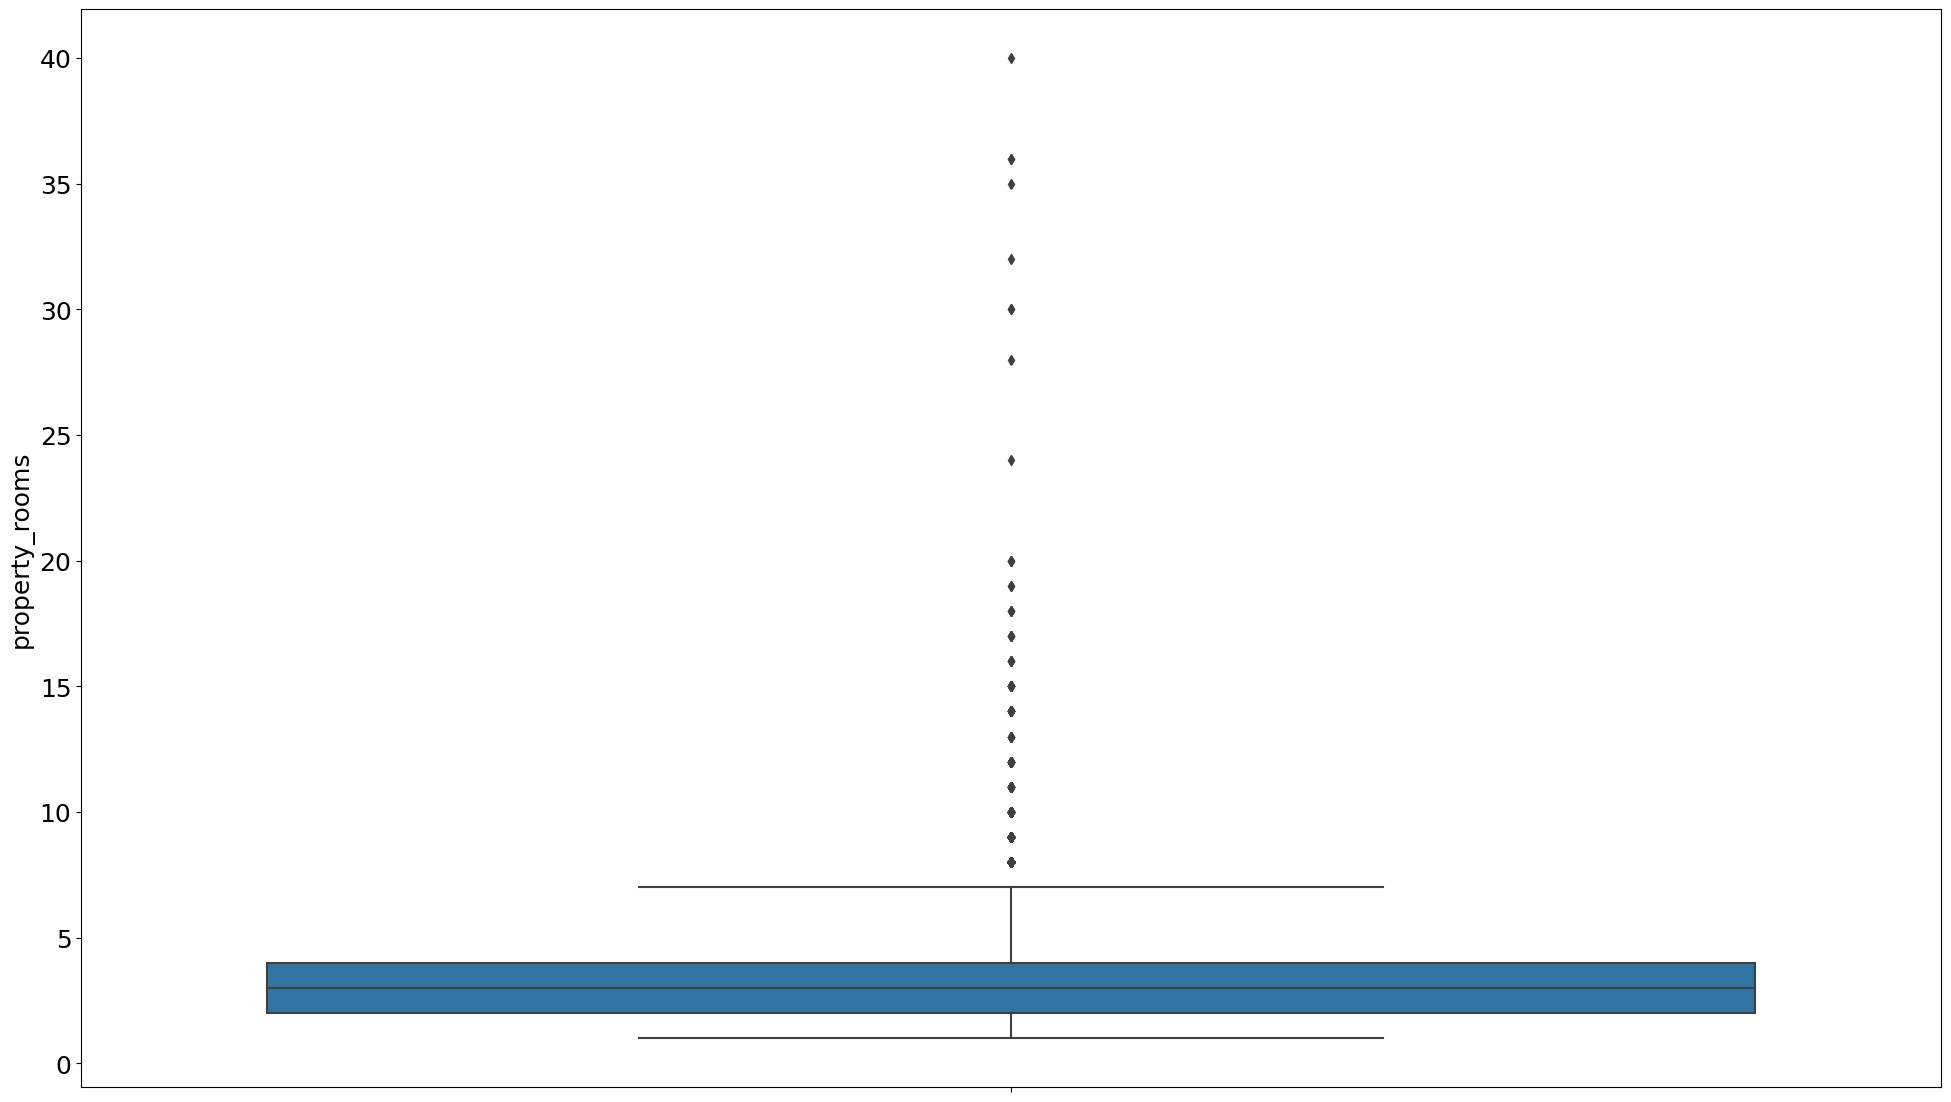

In [176]:
sns.boxplot(y=df_filtrado.property_rooms)

<AxesSubplot:ylabel='property_bedrooms'>

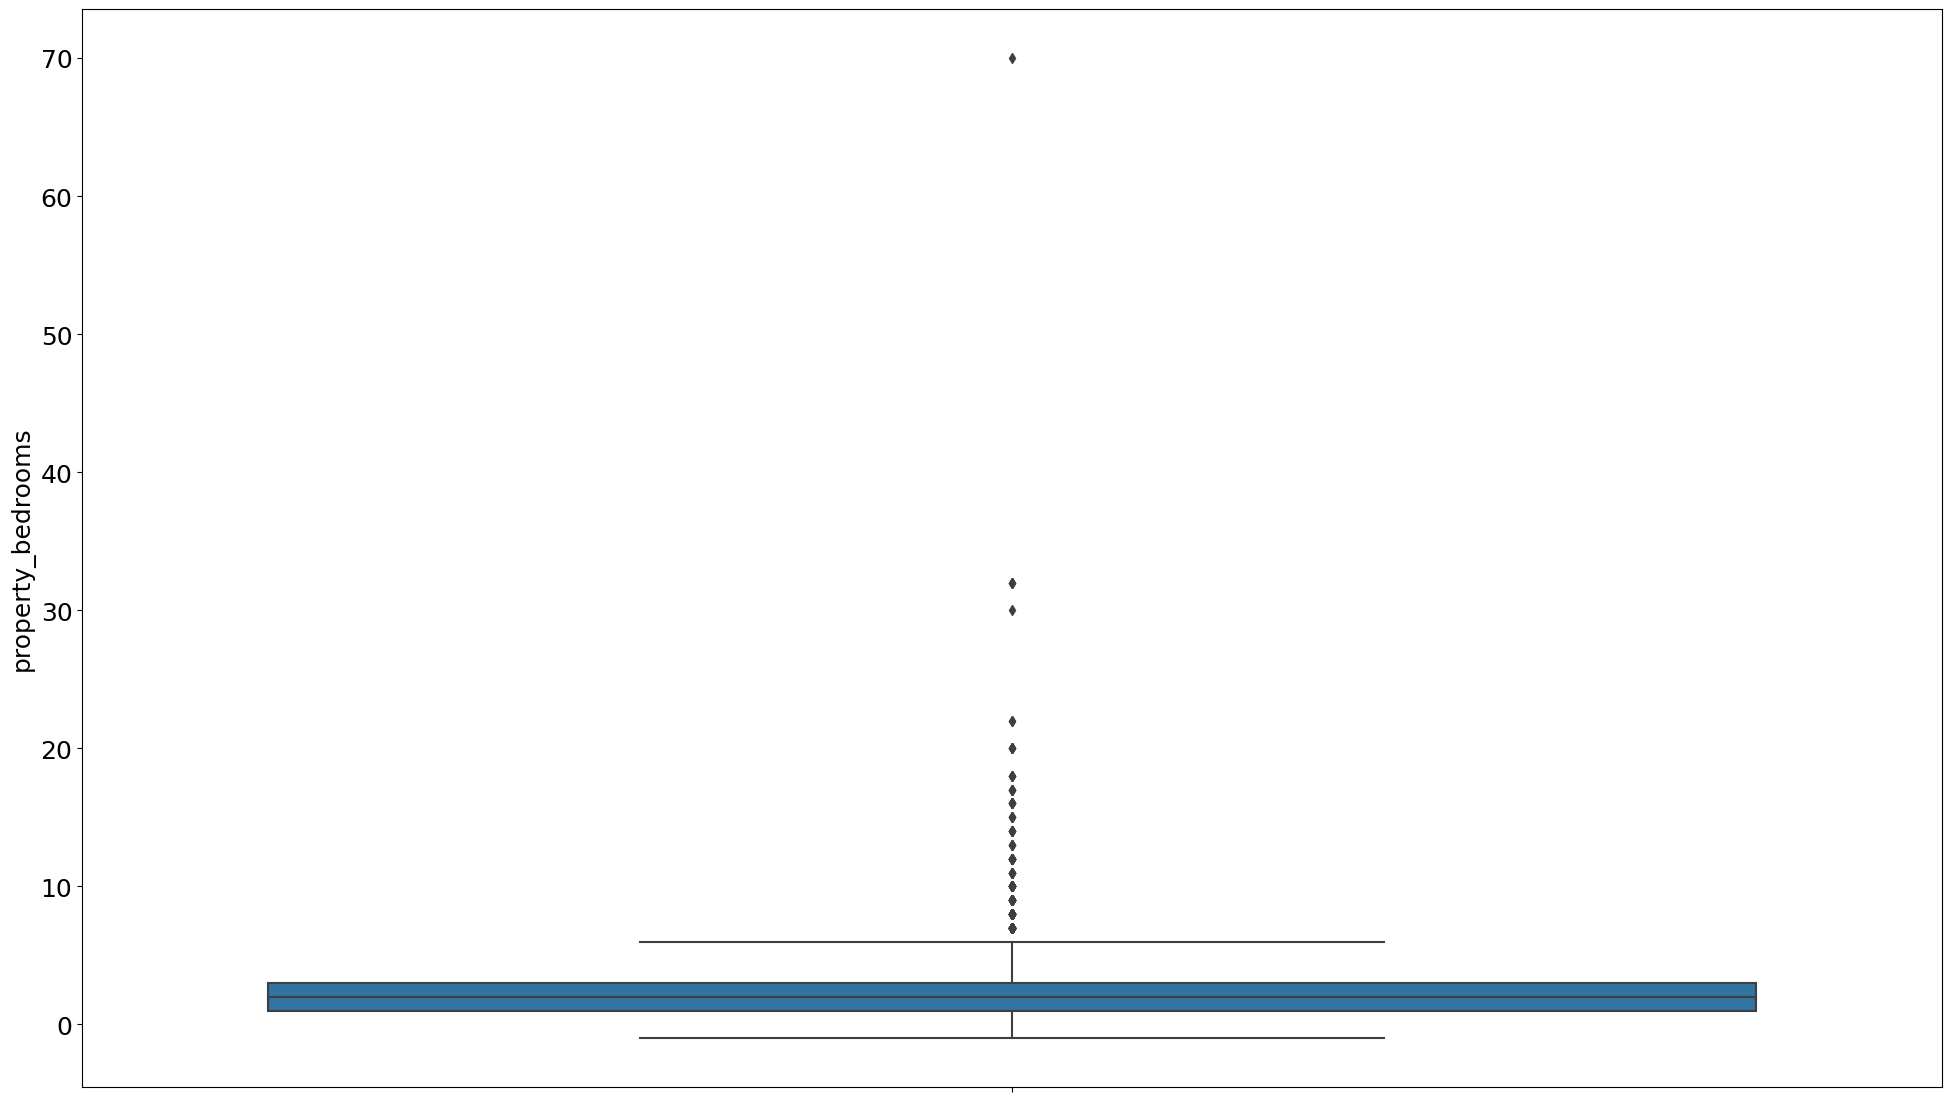

In [177]:
sns.boxplot(y=df_filtrado.property_bedrooms)

<function matplotlib.pyplot.show(close=None, block=None)>

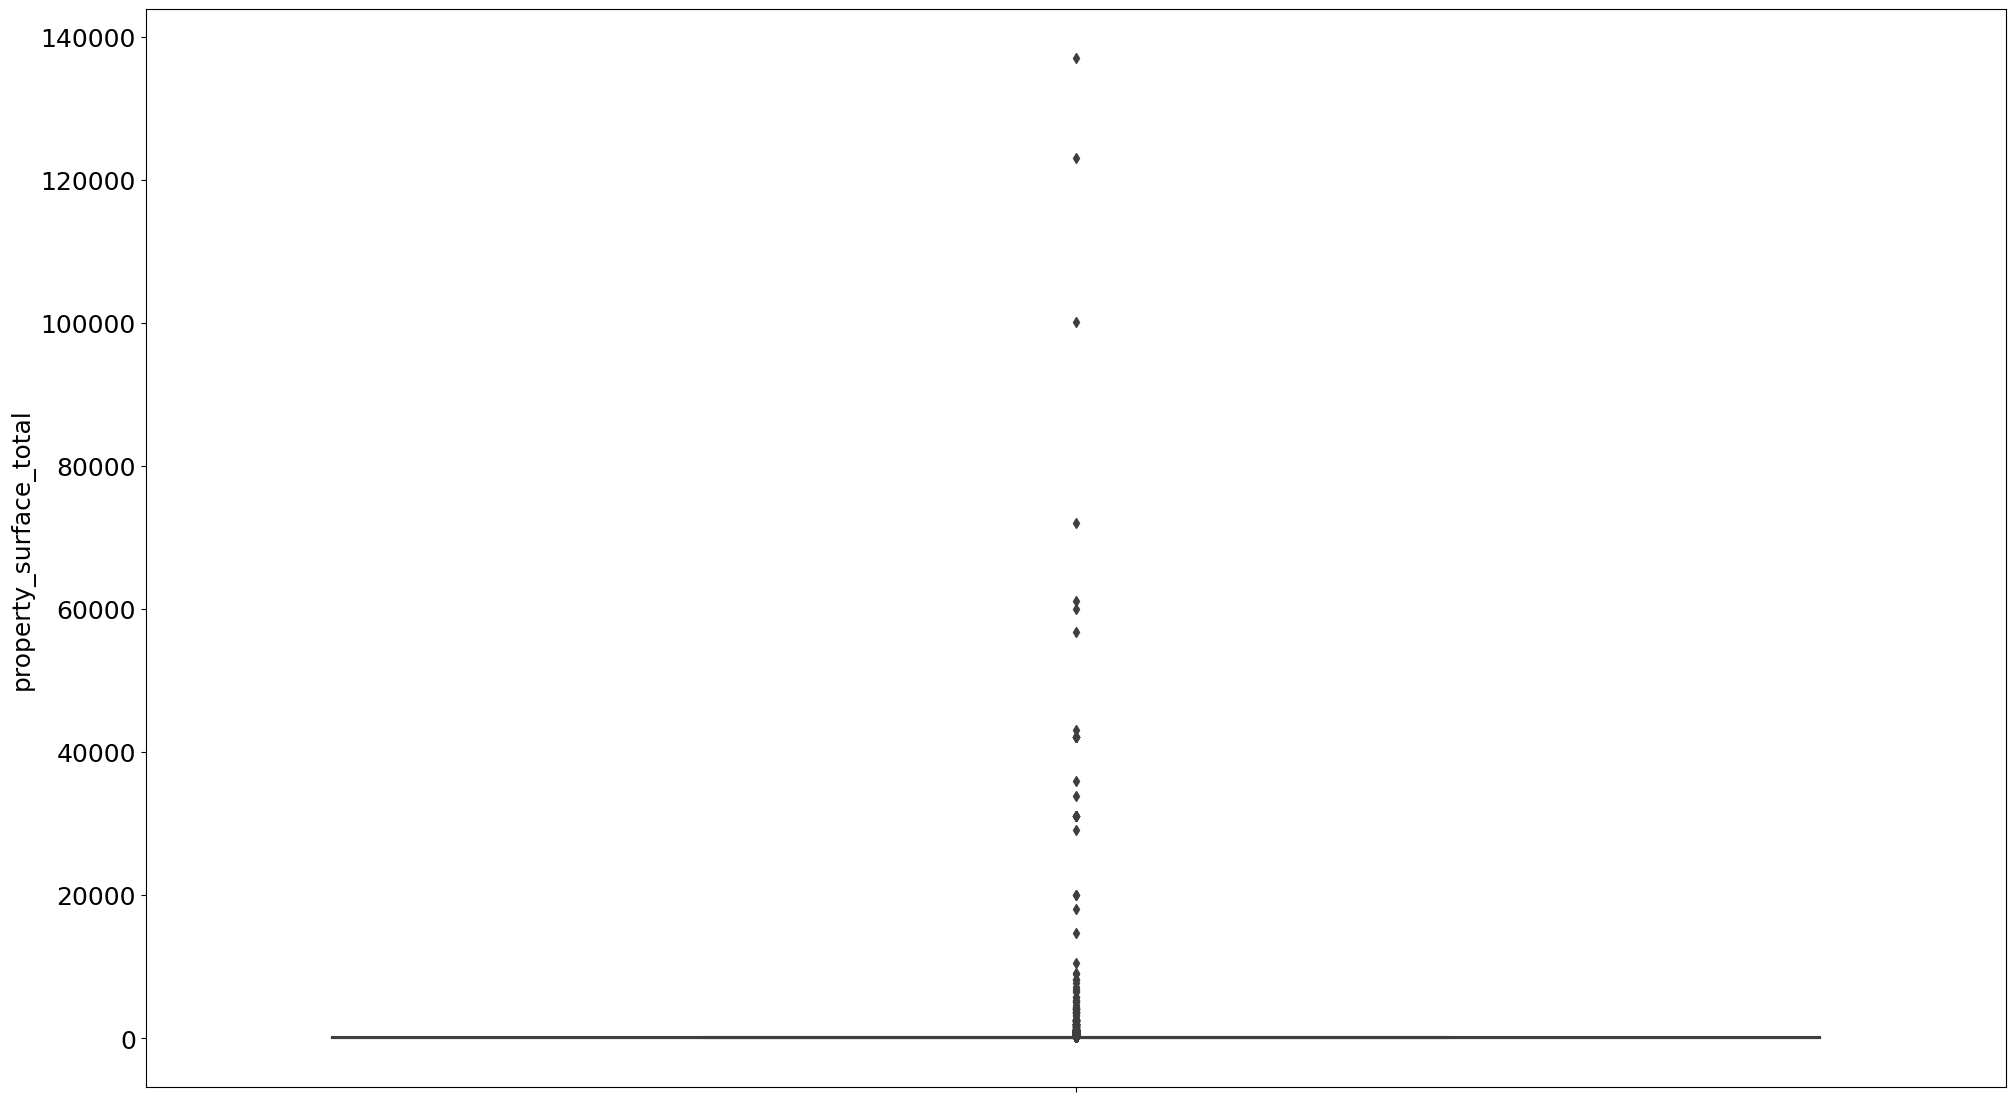

In [127]:
sns.boxplot(y=df_filtrado.property_surface_total)

<AxesSubplot:ylabel='property_surface_covered'>

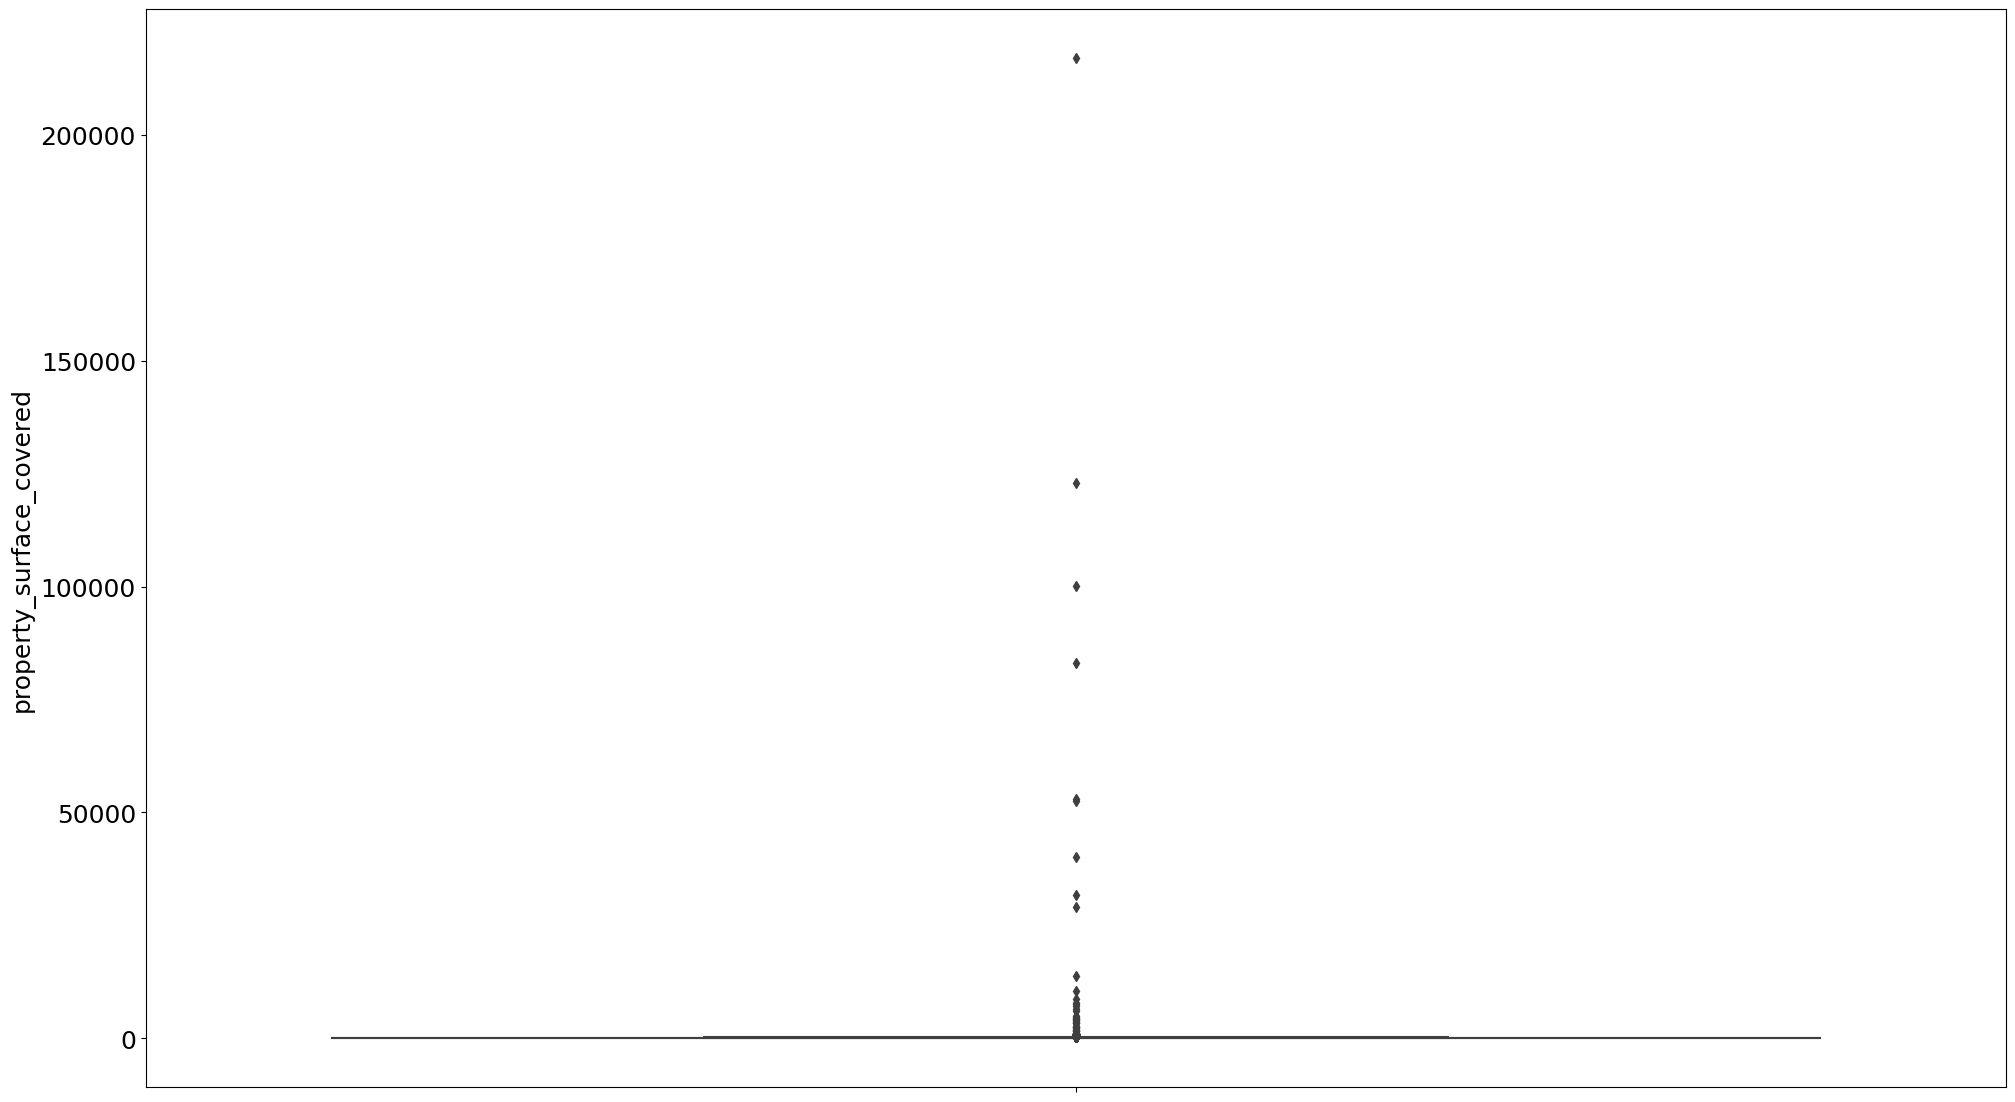

In [160]:
sns.boxplot(y=df_filtrado.property_surface_covered)

<AxesSubplot:ylabel='property_price'>

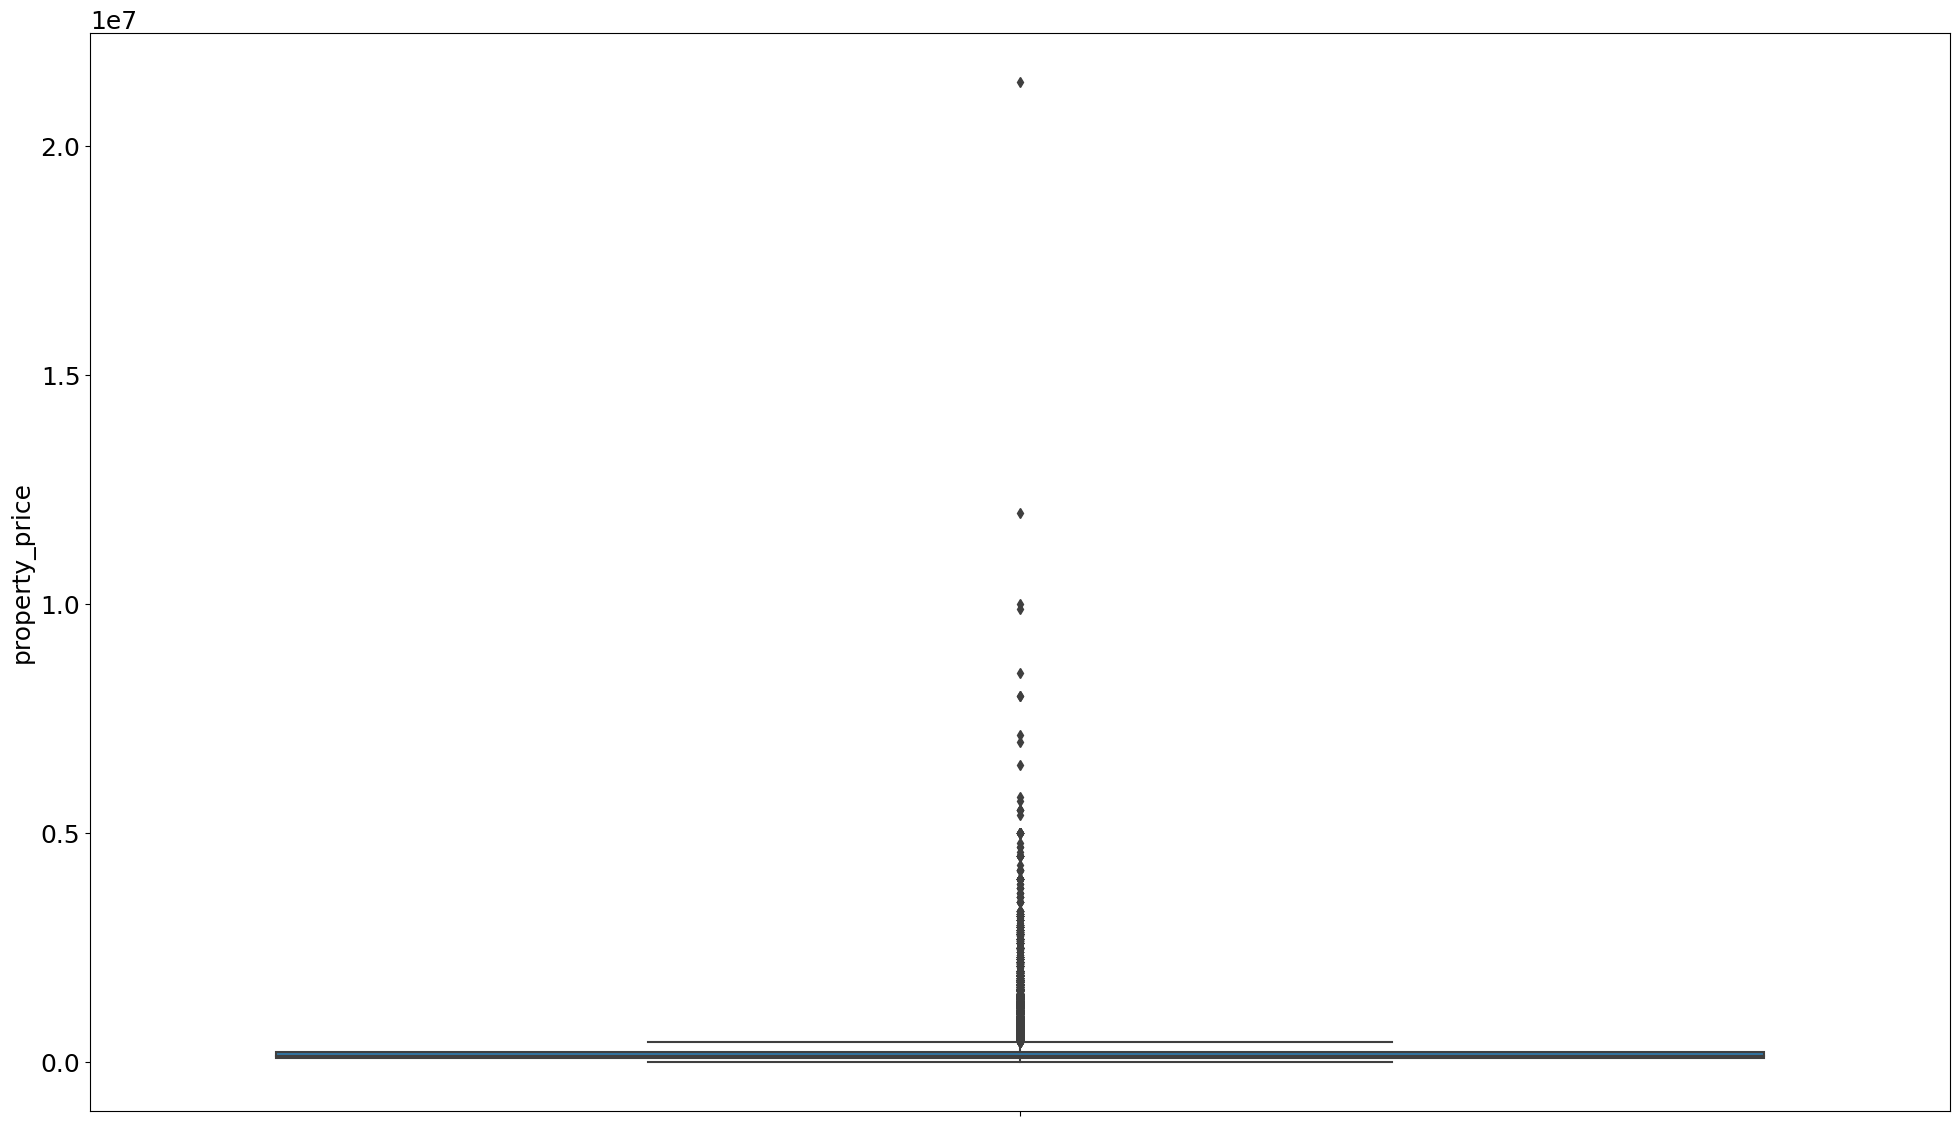

In [171]:
sns.boxplot(y=df_filtrado.property_price)
#(df[['property_price']] <= 0).any().to_frame('Precio menor a 0?')
#df[df['property_price'] <= 0].head()

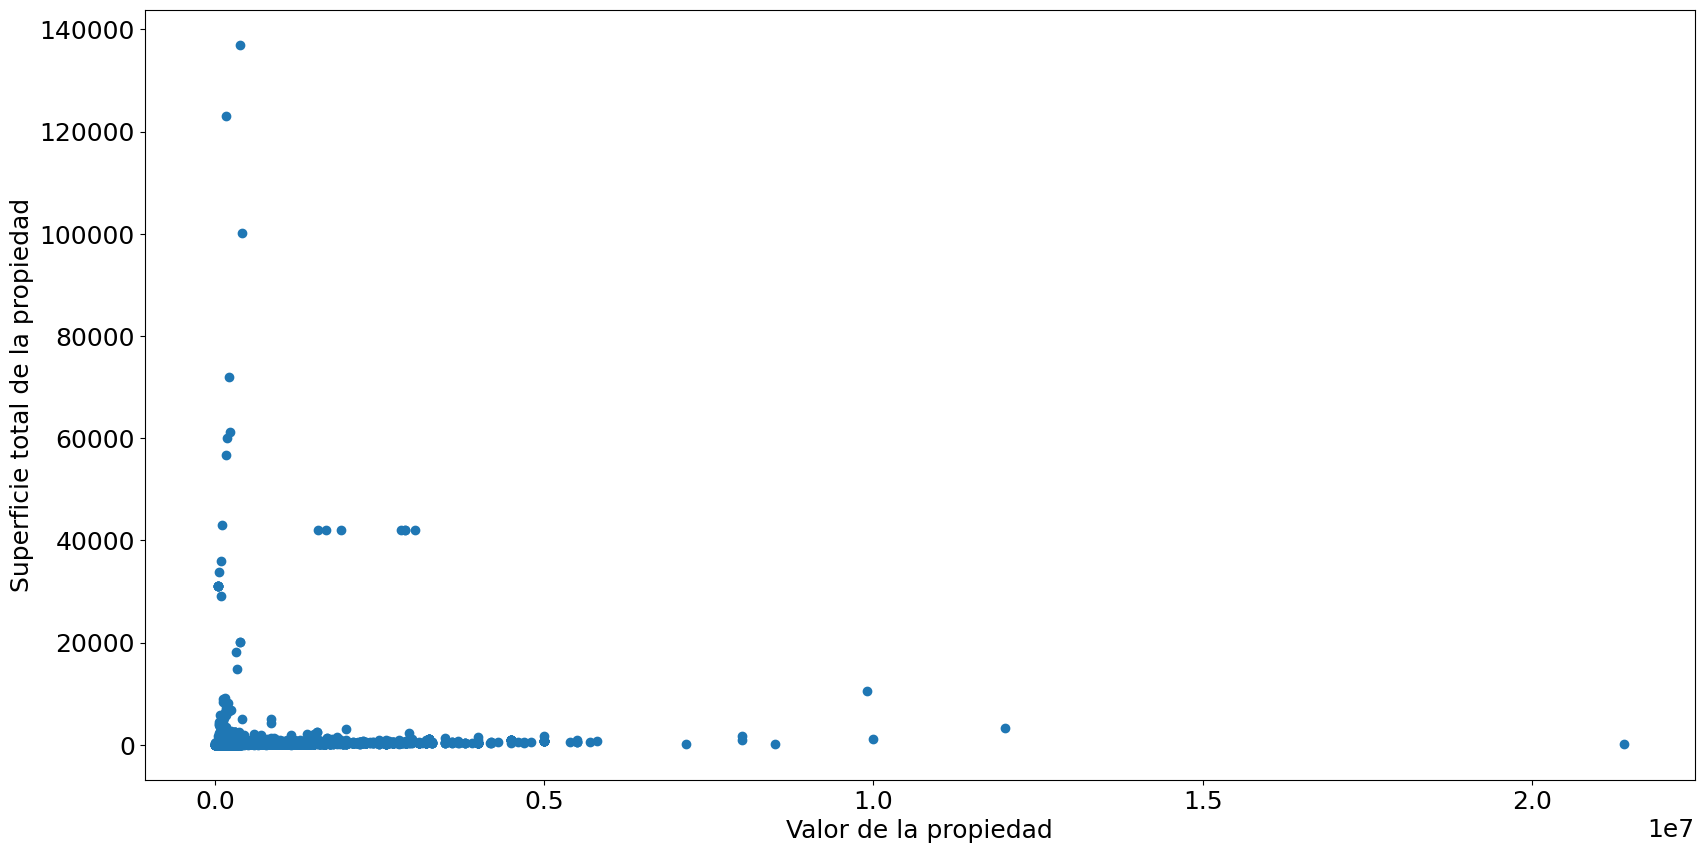

In [156]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(x=df_filtrado.property_price, y=df_filtrado.property_surface_total)

ax.set_xlabel('Valor de la propiedad')
ax.set_ylabel('Superficie total de la propiedad')
plt.show()

En base a los boxplots mostrados, se observan que las 5 variables numéricas, tienen candidatos a datos anómalas. A su vez, en el scatterplot se muestra el valor de la propiedad con la superficie, observando que en varios casos tiene datos que son anormales

Para un mejor análisis, se aplicarán las técnicas de Z-Score y Z-Score modificado:

In [175]:
z_score = pd.DataFrame()
z_score['z_rooms']=st.zscore(df_filtrado.property_rooms)
z_score['z_bedrooms']=st.zscore(df_filtrado.property_bedrooms)
z_score['z_surface_total'] = st.zscore(df_filtrado.property_surface_total)
z_score['z_surface_covered'] = st.zscore(df_filtrado.property_surface_covered)
z_score['z_price'] = st.zscore(df_filtrado.property_price)
z_score


,z_rooms,z_bedrooms,z_surface_total,z_surface_covered,z_price
25,NaN,NaN,NaN,NaN,-0.050967
42,NaN,NaN,NaN,NaN,-0.449898
43,NaN,NaN,NaN,NaN,-0.399364
49,NaN,NaN,NaN,NaN,-0.251845
51,NaN,NaN,NaN,NaN,0.074581
...,...,...,...,...,...
460072,NaN,NaN,NaN,NaN,-0.019580
460073,NaN,NaN,NaN,NaN,-0.204764
460074,NaN,NaN,NaN,NaN,-0.473124
460075,NaN,NaN,NaN,NaN,-0.476263


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cf69c3d-aa8c-478a-9384-e5da0f7d7007' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>